# **Clústering aplicado a la vida real: Inazuma Eleven - Victory Road**
Juego que despertó mucho 'hype' en el 2025 debido a los grandes retrasos que sufrió. Ahora, la comunidad está disfrutando de este juego a más no poder, debido al excesivo contenido que trae, entre ellos, la inmensa cantidad de personajes jugables, llegando casi a los 5000. Cada personaje tiene unas estadísticas especiales: Potencia, pase, elemento, posición, etc. Nuestro objetivo es, aplicar `un clústering` a estos personajes, con el fin de agrupar **los jugadores con características similares,** con el objetivo de primero, **`intentar obtener en los clústers los personajes con misma 'posición' (una característica de los personajes)`** y, de segundo, **`ver si en los grupos, encontramos alguna peculiaridad que puede ser interesante, y a lo mejor ayuda a los jugadores a encontrar algo que no pudieron ver.`** Descrito el objetivo, vamos a comenzar.

## **Obtención de los datos**
Luego de una gran búsqueda, existe una página web que contiene datos de los personajes. Lo bueno, es que esta página hace llamada a un endpoint, lo cual permite mediante petición, `obtener los datos de estos personajes.` No conozco mucho de esto, por lo cual, con un poco de ayuda es posible obtener el siguiente dataframe:

In [121]:
# Librerias a usar
import json
import requests
import pandas as pd

In [122]:
# Funcion para obtener los datos
def obtener_datos(nombre_csv: str='../data/datos_personajes_inazuma.csv', hay_csv: bool=True):

    # Vemos si tenemos los datos
    if hay_csv:

        # Leemos el csv
        return pd.read_csv(nombre_csv, index_col=0)

    else:

        # Obtenemos los datos por internet
        return obtener_datos_internet(nombre_csv)

In [123]:
# Funcion para descargar los datos por internet
def descargar_datos_internet(nombre_csv: str):

    # Obtenemos la API de los datos de los jugadores
    API_URL = 'https://inazuma-calculadoravr.com/api/comparador_api.php'
    
    # Parametros para pasar a la API
    params_api = {
        'action': 'buscar_personajes',
        'limit': 100,
        'offset': 0,
        'orderBy': 'total',
        'orderDir': 'desc'
    }
    
    # Lista con los personajes
    lista_personajes = list()
    
    # Bucle para recolectar personajes poco a poco (en este caso, de 100 en 100)
    while True:
    
        # Hacemos la peticion
        peticion = requests.get(API_URL, params=params_api)
    
        # Detenmos si devuelve error
        peticion.raise_for_status()
        
        # Decodificamos el contenido manualmente
        texto_limpio = peticion.content.decode('utf-8-sig')
    
        # Pasamos a JSON
        datos_json = json.loads(texto_limpio)
    
        # Obtenemos los datos
        batch_datos = datos_json.get('data', list())
    
        # Si ya no hay nada, paramos
        if not batch_datos:
            break
    
        # Añadimos a la lista de personajes
        lista_personajes.extend(batch_datos)
    
        # Vemos como vamos
        print(f'Descargados {len(batch_datos)} personajes... (Total acumulado: {len(lista_personajes)})')
    
        # Cogemos los siguientes 100
        params_api['offset'] += len(batch_datos)
    
    # Mensaje de finalizacion
    print(f'\n¡Listo! Total personajes descargados: {len(lista_personajes)}')
    
    # Creamos el dataframe
    df = pd.DataFrame(lista_personajes)
    
    # Guaradmos
    df.to_csv('datos_personajes_inazuma.csv')
    print('Datos de los personajes guardados exitosamente')

    # Devolvemos el df
    return df

In [124]:
# Obtenemos los datos
df = obtener_datos()

Con el csv descargado, ya podemos comenzar a trabajar.

## **Vista rápida al csv**
Vamos a ver como está nuestro csv para ver si se formo bien o no:

In [125]:
# Vemos las columnas para ver que describen
df.columns

Index(['numero', 'nombre', 'apodo', 'juego', 'arquetipo', 'posicion_en',
       'elemento_en', 'disparo', 'control', 'tecnica', 'defensa', 'fisico',
       'velocidad', 'inteligencia', 'total', 'age_group', 'genero', 'rol',
       'imagen_url', 'fecha_creacion', 'fecha_actualizacion'],
      dtype='str')

Vemos columnas extrañas como 'numero' o 'juego'. Veamos unos datos para ver que son en verdad:

In [126]:
# Vemos los 5 primeros datos
df.head(5)

,numero,nombre,apodo,juego,arquetipo,posicion_en,elemento_en,disparo,control,tecnica,...,fisico,velocidad,inteligencia,total,age_group,genero,rol,imagen_url,fecha_creacion,fecha_actualizacion
0,3358,Mehr,Mehr,Inazuma Eleven GO Chrono Stones: Wildfire / Th...,Justicia,MF,Wind,140,161,162,...,119,119,145,969,Exobeing,Female,Player,https://dxi4wb638ujep.cloudfront.net/1/k/v/i/v...,2025-12-21 14:50:45,2025-12-21 14:50:45
1,3617,Arion Sherwind,Arion,Inazuma Eleven GO Chrono Stones: Wildfire / Th...,Unknown,MF,Wind,140,161,162,...,119,119,145,969,Middle School,Male,Player,https://dxi4wb638ujep.cloudfront.net/1/k/y/e/y...,2025-12-21 14:50:46,2025-12-21 14:50:46
2,3607,Arion Sherwind,Arion,Inazuma Eleven GO Chrono Stones: Wildfire / Th...,Unknown,MF,Wind,140,161,162,...,119,119,145,969,Middle School,Male,Player,https://dxi4wb638ujep.cloudfront.net/1/k/b/v/b...,2025-12-21 14:50:46,2025-12-21 14:50:46
3,2683,Arion Sherwind,Arion,NaN,Afinidad,MF,Wind,140,161,162,...,119,119,145,969,NaN,NaN,NaN,https://dxi4wb638ujep.cloudfront.net/1/k/u/o/u...,2025-12-21 14:50:44,2026-01-05 19:25:09
4,2328,Arion Sherwind,Arion,Inazuma Eleven GO: Light / Shadow,Afinidad,MF,Wind,140,161,162,...,119,119,145,969,Middle School,Male,Player,https://dxi4wb638ujep.cloudfront.net/1/k/o/o/o...,2025-12-21 14:50:43,2025-12-21 14:50:43


Podemos deducir lo siguiente:
- Vemos que **numero** no nos dice nada, por lo cual `vamos a eliminar dicha columna.`
- La columna `imagen_url` no nos servirá de nada, por lo cual **procedemos a eliminarla.**
- La columna `apodo` tampoco define algo útil, por lo cual es otra **que vamos a eliminar.**
- Las columnas de **fechas** en realidad `tampoco aportan algo útil,` asi que las eliminamos también.
- Otra cosa, es que vemos `nombres repetidos,` lo cual trataremos luego.

Con esto, procedemos a realizar los debidos cambios:

In [127]:
# Eliminamos las columnas mencionadas
df_sin_datos_innecesarios = df.drop(columns=['numero', 'imagen_url', 'apodo', 'fecha_creacion', 'fecha_actualizacion'])
df_sin_datos_innecesarios.columns

Index(['nombre', 'juego', 'arquetipo', 'posicion_en', 'elemento_en', 'disparo',
       'control', 'tecnica', 'defensa', 'fisico', 'velocidad', 'inteligencia',
       'total', 'age_group', 'genero', 'rol'],
      dtype='str')

Ahora vamos a tratar la columna 'nombre'. Es muy raro **`ver nombres repetidos de los jugadores, ya que debería de ser único.`** Vamos a ver que pasa con esos datos:

In [128]:
# Obtenemos los nombres de los personajes repetidos
nombres_personajes = df_sin_datos_innecesarios['nombre'].duplicated(keep=False)

# Mostramos datos de dichos personajes
df_sin_datos_innecesarios[nombres_personajes].sort_values(by='nombre')

,nombre,juego,arquetipo,posicion_en,elemento_en,disparo,control,tecnica,defensa,fisico,velocidad,inteligencia,total,age_group,genero,rol
1439,Aila Pavey,Inazuma Eleven: Victory Road,Unknown,FW,Wind,145,141,127,113,109,105,126,866,Middle School,Female,Player
1428,Aila Pavey,Inazuma Eleven: Victory Road,Unknown,FW,Wind,145,141,127,113,109,105,126,866,Middle School,Female,Player
249,Alice Rendell,Inazuma Eleven: Victory Road,Unknown,MF,Forest,130,151,152,113,109,109,135,899,Middle School,Male,Manager
253,Alice Rendell,Inazuma Eleven: Victory Road,Contraataque,MF,Forest,130,151,152,113,109,109,135,899,Middle School,Male,Manager
1434,Alphonse Wreckenbach,Inazuma Eleven: Victory Road,Unknown,FW,Fire,145,141,127,113,109,105,126,866,Middle School,Male,Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,Zed Kyu,Inazuma Eleven GO Chrono Stones: Wildfire / Th...,Contraataque,MF,Wind,130,141,137,113,114,105,126,866,Exobeing,Male,Player
595,Zohen,Inazuma Eleven 2: Firestorm / Blizzard,Afinidad,DF,Mountain,110,116,113,137,142,119,159,896,Middle School,Male,Player
600,Zohen,Inazuma Eleven 2: Firestorm / Blizzard,Afinidad,DF,Mountain,110,116,113,137,142,119,159,896,Middle School,Male,Player
2519,Zuzu Intel,Inazuma Eleven: Victory Road,Juego Sucio,FW,Forest,154,145,133,107,105,105,116,865,Middle School,Female,Player


Vemos que lo que pasa es:
- O tenemos `valores duplicados.`
- O que `hay registros algunos incompletos y otros con toda la información.`

Para arreglar esto, tenemos que primero **borrar los duplicados,** y luego, **conservar los registros que tengan más información.** Primero vamos a tratar `los nombres duplicados,` porque esto afectará luego a la hora de eliminar duplicados.

Vamos a `conservar los registros con más información.` Para ello, debemos de **identificar cuales son los valores nulos (no válidos), y cuales no.** Con eso, podemos eliminar **los registros con mayores valores 'nulos' y quedarnos con los de más información:**

In [129]:
# Libreria a usar
import numpy as np

In [130]:
# Valores desconocidos
valores_desconocidos = {'Unknown': np.nan, '?': np.nan, '???': np.nan}

# Actualizamos los nombres repetidos
nombres_personajes = df_sin_datos_innecesarios['nombre'].duplicated(keep=False)

# Obtenemos solo los registros con los nombres repetidos
df_nombres_repetidos = df_sin_datos_innecesarios.loc[nombres_personajes]

# Reemplazamos los valores desconocidos por nan
df_nombres_repetidos = df_nombres_repetidos.replace(valores_desconocidos)

# Creamos una columna de 'scores' para saber que columnas tienen mas informacion (menos nulos)
df_nombres_repetidos['score_nulos'] = df_nombres_repetidos.notna().sum(axis=1)

# Ordenamos de mayor a menor score
df_nombres_repetidos = df_nombres_repetidos.sort_values(by=['nombre', 'score_nulos'], ascending=False)

# Eliminamos los repetidos, conservando el de mayor score
df_nombres_repetidos = df_nombres_repetidos.loc[df_nombres_repetidos['nombre'].drop_duplicates(keep='first').index, :]
df_nombres_repetidos['nombre'].duplicated().sum()

np.int64(0)

Con esto, vamos ahora a `eliminar los datos duplicados.` Para ello hay que tener cuidado: Podemos generar **registros duplicados (nombres) si primero `no nos cargamos todos los nombres duplicados.`** Para ello, primero obtendremos solo **los registros sin nombres duplicados,** luego, **eliminaremos los registros duplicados,** y finalmente, **los juntamos con los nombres que obtuvimos en la celda anterior:**

In [131]:
# Mascara con los nombres no duplicados (borrados)
mascara_nombres_duplicados = ~(df_sin_datos_innecesarios['nombre'].duplicated(keep=False))

# Obtenemos nombres que no sean duplicados, y borramos registros duplicados
df_sin_nombres_duplicados = df_sin_datos_innecesarios[mascara_nombres_duplicados].drop_duplicates()

# Ponemos los valores desconocidos a nan, ya que es mas facil tratarlos
df_sin_nombres_duplicados = df_sin_nombres_duplicados.replace(valores_desconocidos)

# Contatenamos los nombres que hemos obtenido antes (los duplicados quedandonos con los de mas informacion)
df_valores_unicos = pd.concat([df_sin_nombres_duplicados, df_nombres_repetidos], axis=0).drop(columns='score_nulos').drop_duplicates()

# Mostramos si hay duplicados en nombres y en registros
print(f'Registros con nombres duplicados: {df_valores_unicos["nombre"].duplicated().sum()}')
print(f'Registros duplicados: {df_valores_unicos.duplicated().sum()}')

Registros con nombres duplicados: 0
Registros duplicados: 0


Por último, comprobaremos si hay jugadores `sin stats,` ya que solo aportan ruido:

In [132]:
# Obtenemos los jugadores con 0 stats
mascara_jugadores_sin_stats = df_valores_unicos.select_dtypes(include=np.number).sum(axis=1) == 0

# Los quitamos
df_valores_unicos = df_valores_unicos[~mascara_jugadores_sin_stats].reset_index(drop=True)

# Mostramos los jugadores que quitamos
print(f'Jugadores con 0 de stats: {mascara_jugadores_sin_stats.sum()}')

Jugadores con 0 de stats: 4


## **Preprocesado de los datos**
Terminada la fase de ver los datos, es hora de `preprocesar los datos.` Dicho esto, vamos a analizar ahora si el `dataset más en detalle.` Luego, columna por columna, comenzando por las **numéricas** y terminando con las **categóricas**

### **Preprocesando el dataset (vistazo más a detalle)**
Para ello, vamos a ver algunos **datos básicos** gracias a herramientas como `describe e info:`

In [133]:
# Informacion basica del dataset
df_valores_unicos.info()

<class 'pandas.DataFrame'>
RangeIndex: 4693 entries, 0 to 4692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nombre        4693 non-null   str  
 1   juego         4251 non-null   str  
 2   arquetipo     4181 non-null   str  
 3   posicion_en   4693 non-null   str  
 4   elemento_en   4693 non-null   str  
 5   disparo       4693 non-null   int64
 6   control       4693 non-null   int64
 7   tecnica       4693 non-null   int64
 8   defensa       4693 non-null   int64
 9   fisico        4693 non-null   int64
 10  velocidad     4693 non-null   int64
 11  inteligencia  4693 non-null   int64
 12  total         4693 non-null   int64
 13  age_group     4250 non-null   str  
 14  genero        4238 non-null   str  
 15  rol           4250 non-null   str  
dtypes: int64(8), str(8)
memory usage: 586.8 KB


Vemos qie todas las columnas numéricas `no tienen nulos, lo cual es bueno.` Sin embargo, hay columnas que **si presentan nulos, como juego, o age_group.** Como tenemos si o si unos datos que `no tienen nulos,` podriamos **reemplazar dichos nulos ejemplo, o con la moda, o con un nuevo valor 'sin registro'.** Para ello, cuando lleguemos con las variables categóricas, `dictaremos si es necesario cargarse los registros, o si podemos reemplazarlos con algún valor.`

### **Preprocesando variables numéricas**
Para ello, vamos a tener que ver tanto el `histograma, como el gráfico de caja y bigotes.` Luego, habrá que **ajustar un poco la asimetría hasta donde podamos,** para luego aplicar  `el mejor escalado que se pueda.` Cuando lleguemos a cada parte, explicaremos que hacemos y por qué. De momento, veamos algunos datos descriptivos de estas columnas:

In [134]:
# Obtenemos las variables numericas
columnas_numericas = df_valores_unicos.select_dtypes(include=np.number).columns

# Vemos datos descriptivos de estas columnas numericas
df_valores_unicos[columnas_numericas].describe()

,disparo,control,tecnica,defensa,fisico,velocidad,inteligencia,total
count,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000
mean,125.943746,131.535478,126.583422,118.701683,120.829960,113.623056,131.255061,868.472406
std,17.667570,14.410639,13.407625,9.611001,13.406558,12.271945,12.647878,16.669635
min,106.000000,110.000000,107.000000,107.000000,105.000000,105.000000,116.000000,860.000000
25%,110.000000,116.000000,113.000000,107.000000,105.000000,105.000000,120.000000,861.000000
50%,126.000000,141.000000,127.000000,117.000000,114.000000,109.000000,126.000000,865.000000
75%,145.000000,145.000000,137.000000,127.000000,133.000000,113.000000,145.000000,866.000000
max,169.000000,161.000000,162.000000,142.000000,147.000000,155.000000,163.000000,969.000000


In [135]:
# Libreria a usar
import matplotlib.pyplot as plt

In [136]:
# Funcion que servira para mostrar el histograma y el grafico de caja y bigote
def mostrar_graficos_numericos(df: pd.DataFrame, columna: str):

    # Creamos el lienzo
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))

    # Creamos el histograma
    axes[0].hist(df[columna], edgecolor='black')
    axes[0].set_xlabel('Valores')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_title(f'Histagrama de {columna}')

    # Creamos el boxplot
    axes[1].boxplot(df[columna])
    axes[1].set_title(f'Boxplot de {columna}')

    # Mostramos
    plt.tight_layout()
    plt.show()

#### **Columna 'disparo'**
Entendemos este registro como `el nivel de disparo de cada personaje.` Veamos los gráficos a ver que podemos deducir:

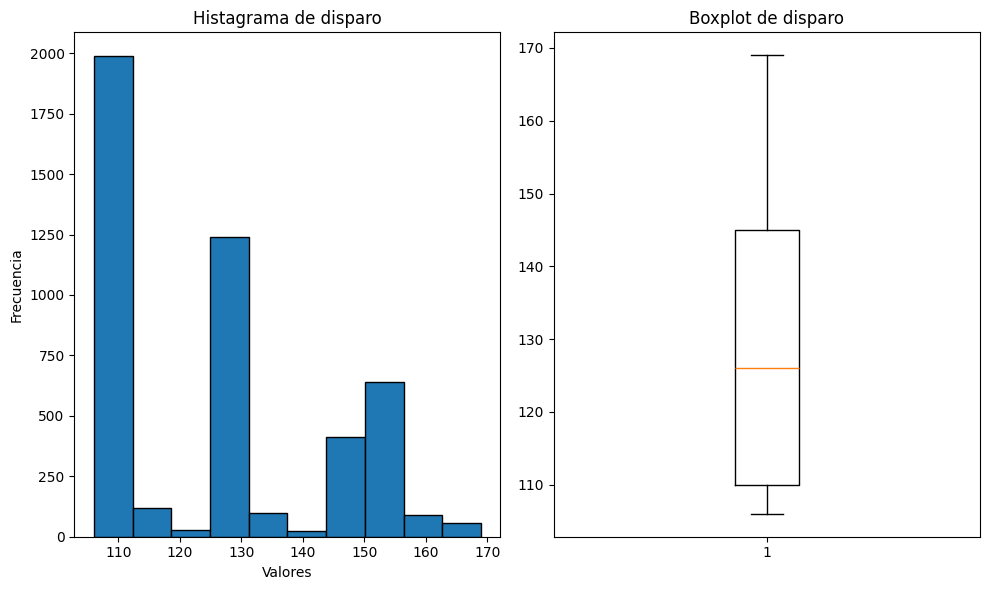

In [137]:
# Vemos los graficos de disparo
mostrar_graficos_numericos(df_valores_unicos, 'disparo')

Claramente vemos **dos grupos:**
- Un grupo el cual `es donde viven la mayoría de datos.`
- Otro grupo el cual `no tienen nada de disparo.`

Vemos que, aunque el gráfico de caja y bigote **lo marque como atípico,** en verdad `estos son datos verdaderos.` Cargarse estos datos es perder información real, asi que debemos de conservarlos. Vamos a ver como de 'simétrico' son los datos:

In [138]:
# Vemos la simetría de los datos de disparo
df_valores_unicos['disparo'].skew()

np.float64(0.5452705755132702)

Vemos que en verdad, `hay simetría.` Pero seguramente esta 'simetría' se deba a los valores '0'. Con esto, al tener **una unimodal, y sabiendo que `no hay atípicos`,** lo mejor será apuntar esta columna para `aplicarle un RobustScaler.` Podríamos aplicar un StandardScaler si no fuera por los datos 'atípicos'. Robust conserva bien los datos que están en la caja, ya que se basa en el `uso de la mediana,` mientras que Standard lo hace con la media, siendo esta muy afectada por los atípicos. Es verdad que a lo mejor los datos atípicos `terminan acercándose a los de la caja,` pero lo importante es conservar **la 'forma' de los datos que están dentro de la caja,** ya que esta es la mayoría de la población:

In [139]:
# Lista que contiene las columnas que se les aplicara robust
columnas_robust = list()

# Añadimos 'disparo'
columnas_robust.append('disparo')
columnas_robust

['disparo']

#### **Columna 'control'**
Entendemos este registro como `el nivel de control (en cuanto a fútbol) de cada personaje.` Veamos los gráficos a ver que podemos deducir:

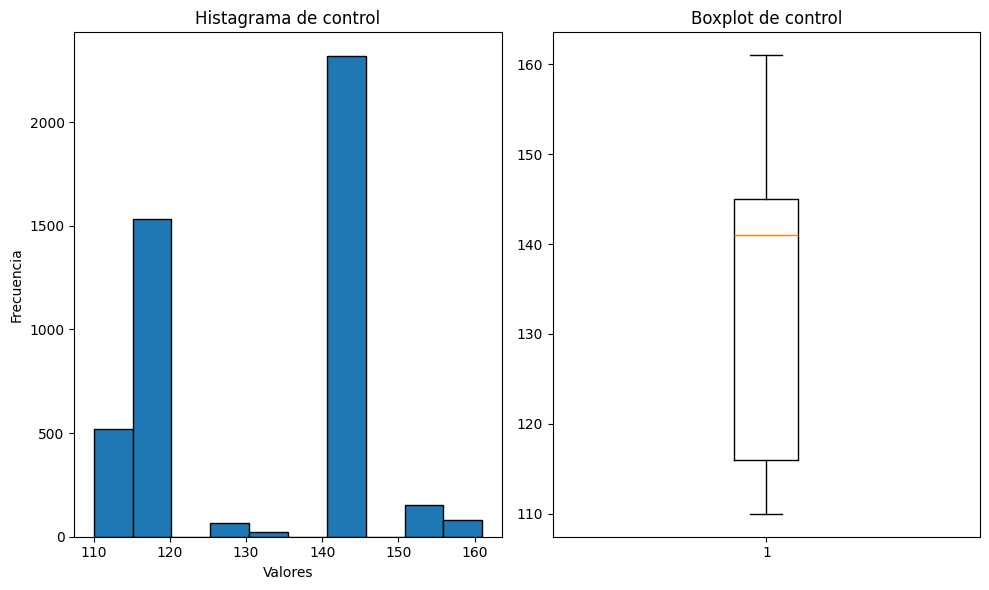

In [140]:
# Vemos los graficos de control
mostrar_graficos_numericos(df_valores_unicos, 'control')

Nos pasa exactamente (casi) lo mismo que con disparo: `Una población bien definida y unos pocos datos reales muy alejados.` Veamos de nuevo la asimetría:

In [141]:
# Vemos la simetría de los datos de control
df_valores_unicos['control'].skew()

np.float64(-0.18229510079597397)

Aquí si que vemos que es asimétrica. Podríamos considerar 'arreglar' esto, pero yo tengo una regla que me gusta usar:
- Si la asimetría es muy significativa (para mi, sería un skew mayor a +-0.85), `podemos intentar arreglarlo.`
- En caso contrario, es mejor `dejarlo tal como está.`

Defino esto ya que, se suele decir que un skew **entre -0.5 y +0.5 se `puede considerar simétrico.`** Si supera estos valores, pero no pasa del +-0.75, es una `asimetría tratable.` En caso de pasar esto, `hay que intentar corregirla.`

Como aquí tenemos solo 2 opciones (o intentar arreglarla o dejarla así), pues he probado y comprobado que **si ampliamos el rango de 'simetría/asimetría tratable' hasta +-0.75,** y luego, poner **un pequeño 'umbral' de error (en mi caso +-0.05),** podemos saber si es necesario `tratar la asimertría o no.` En nuestro caso, con 'control' **no es necesario tratar la asimetría según este rango definido.**

Para terminar con 'control', similar que disparo, `vamos a anotarla para aplicarlo Robust debido a las mismas razones que con 'disparo':`

In [142]:
# Anotamos control para robust
columnas_robust.append('control')
columnas_robust

['disparo', 'control']

#### **Columna 'tecnica'**
Entendemos este registro como `el nivel de tecnica (a lo mejor es la calidad) de cada personaje.` Veamos los gráficos a ver que podemos deducir:

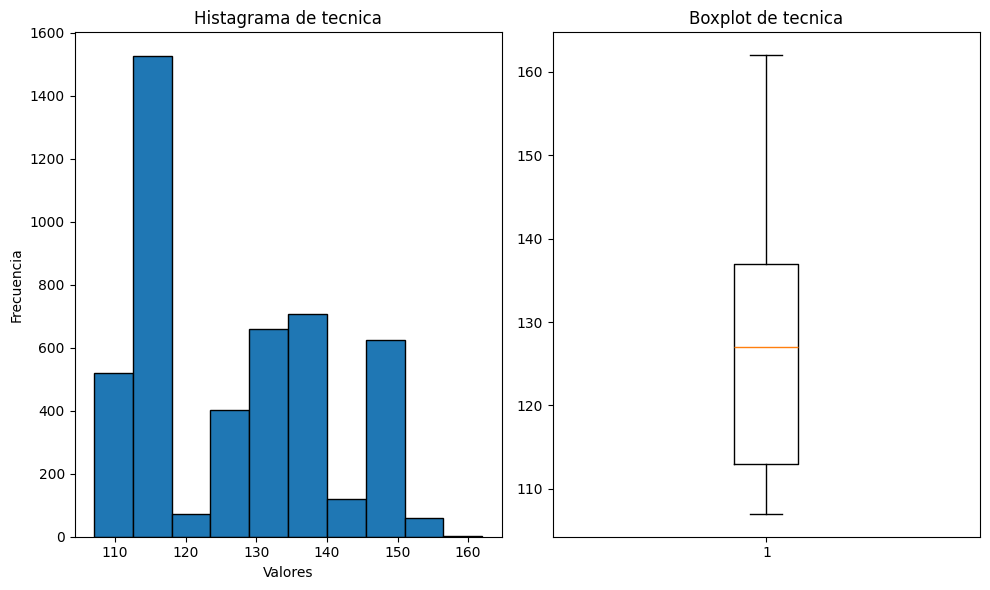

In [143]:
# Vemos los graficos de tecnica
mostrar_graficos_numericos(df_valores_unicos, 'tecnica')

Tenemos exactamente lo mismo que 'disparo' y 'control', y este patrón se repetirá con las demás stats. Para no alargar mucho, vamos a mirar desde ahora el skew y según ello, aplicamos `alguna transformación (ejemplo lgaritmo o raiz cúbica) o no:`

In [144]:
# Vemos el skew de tecnica
df_valores_unicos['tecnica'].skew()

np.float64(0.12807061406685027)

Como está en el rango de `simétrico/asimétrico tratable,` lo dejamos así tal cual, aplicando solo Robust más adelante:

In [145]:
# Añadimos la columna para robust
columnas_robust.append('tecnica')
columnas_robust

['disparo', 'control', 'tecnica']

#### **Columna 'defensa'**
Entendemos este registro como `el nivel de defensa de cada personaje.` Veamos los gráficos a ver que podemos deducir:

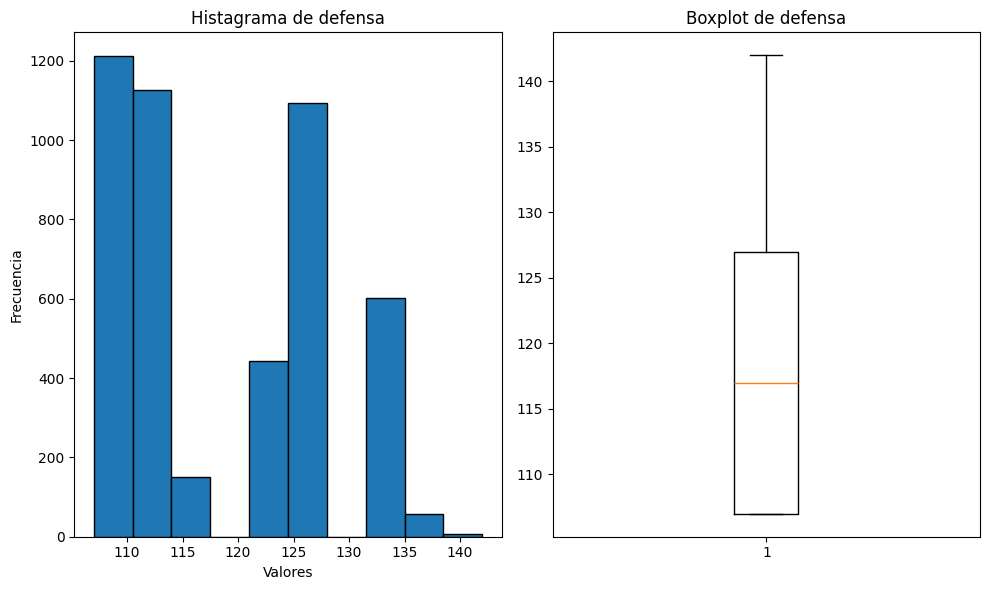

In [146]:
# Vemos los graficos de tecnica
mostrar_graficos_numericos(df_valores_unicos, 'defensa')

Vemos el skew:

In [147]:
# Skew para defensa
df_valores_unicos['defensa'].skew()

np.float64(0.17523132044741688)

Aquí **superamos nuestro umbral,** por lo cual, lo mejor ahora es `aplicar transformaciones para intentar 'arreglar' esta asimetría.` Como la cola esta *por la izquierda,* con una potencia (al cuadrado), será más que suficiente (si la cola fuera a la derecha, usaríamos la raiz cuadrada al ser poca la cola):

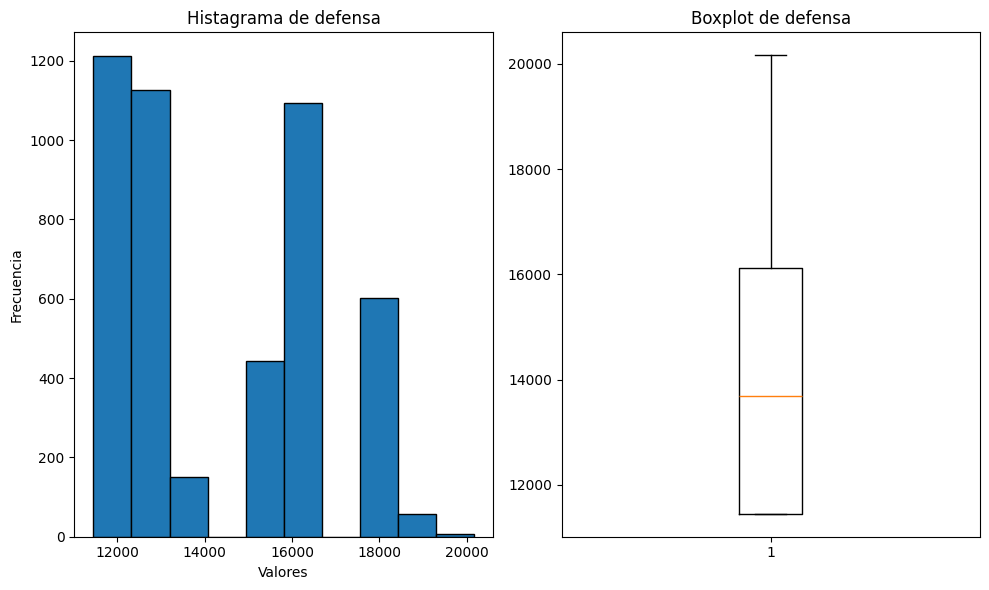

np.float64(0.2425541435811186)

In [148]:
# Copia del df
df_defensa_ajustado = df_valores_unicos.copy()

# Aplicamos el cuadrado a defensa
df_defensa_ajustado['defensa'] = np.pow(df_defensa_ajustado['defensa'], 2)

# Vemos los nuevos graficos
mostrar_graficos_numericos(df_defensa_ajustado, 'defensa')

# Vemos el nuevo skew
df_defensa_ajustado['defensa'].skew()

De nuevo, lo guardamos para aplicarle Robust:

In [149]:
# Guardamos defensa para robust
columnas_robust.append('defensa')
columnas_robust

['disparo', 'control', 'tecnica', 'defensa']

#### **Columna 'fisico'**
Entendemos este registro como `el nivel de físico de cada personaje.` Veamos los gráficos a ver que podemos deducir:

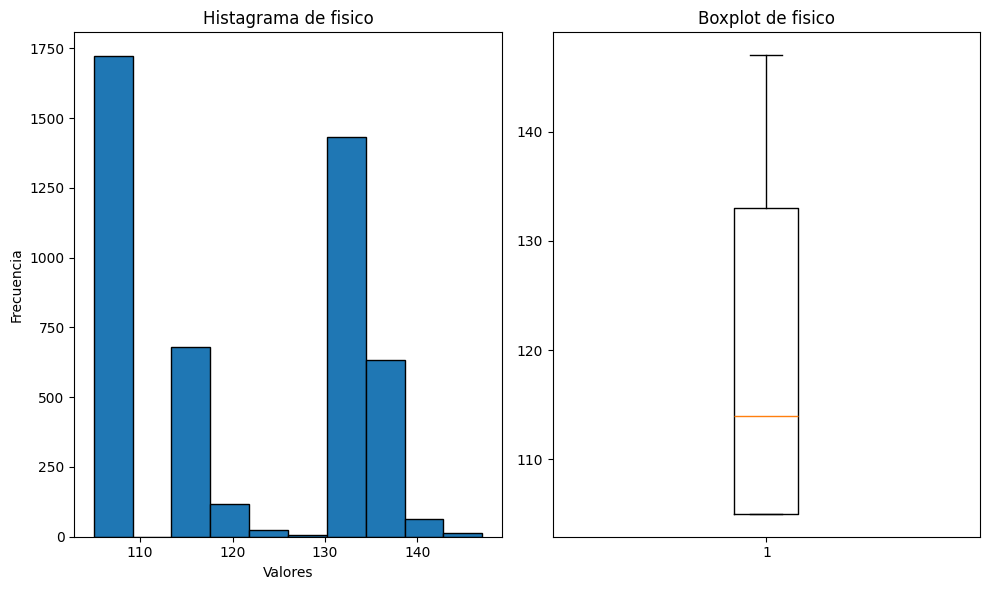

In [150]:
# Vemos los graficos de fisico
mostrar_graficos_numericos(df_defensa_ajustado, 'fisico')

Aunque con una forma más rara, vemos de nuevo el skew:

In [151]:
# Vemos el skew de fisico
df_defensa_ajustado['fisico'].skew()

np.float64(0.06663863931177215)

Como no es mucho, lo dejamos así, marcándolo para aplicarle Robust:

In [152]:
# Marcamos fisico para Robust
columnas_robust.append('fisico')
columnas_robust

['disparo', 'control', 'tecnica', 'defensa', 'fisico']

#### **Columna 'velocidad'**
Entendemos este registro como `el nivel de velocidad de cada personaje.` Veamos los gráficos a ver que podemos deducir:

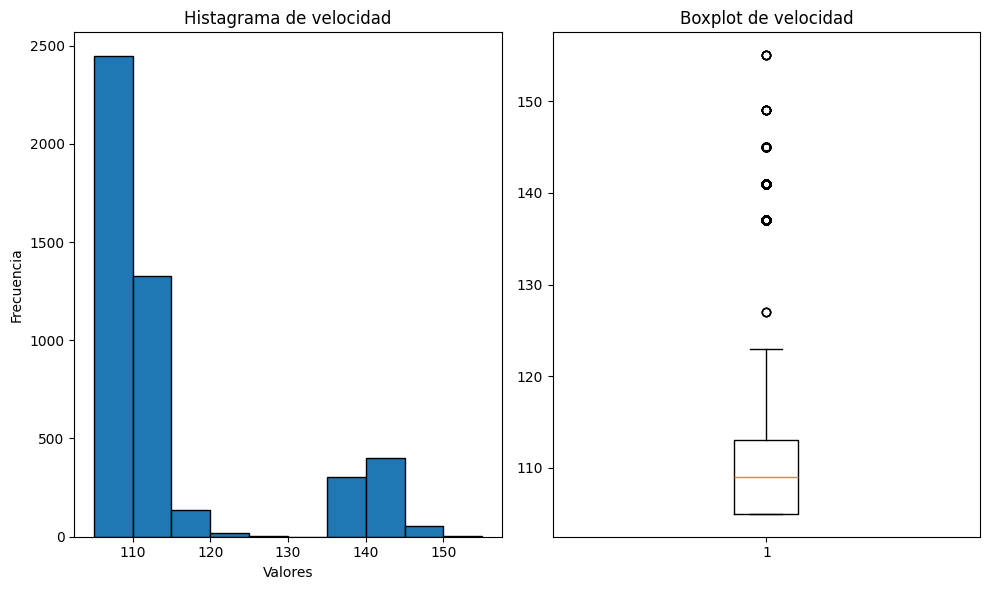

In [153]:
# Vemos los graficos de velocidad
mostrar_graficos_numericos(df_defensa_ajustado, 'velocidad')

Aunque el boxplo **cambia un poco,** nos descirbe `lo mismo que los anteriores gráficos: Valores reales que no son outliers.` Con mucha más razón, la marcamos para Robust, antes viendo el skew:

In [154]:
# Vemos el skew de velocidad
df_defensa_ajustado['velocidad'].skew()

np.float64(1.4829729582040285)

Aunque cerca, sigue estando dentro del grupo de no aplicarle nada. Recordar que el grupo de `no aplicar nada está entre [-0.75 - 0.05, +0.75 + 0.05].` Ese +-0.05 es **un umbral extra que he definido,** el cual *podeis quitar o modificar (como mejor os guste).* Dicho esto, la añadimos para Robust:

In [155]:
# Marcamos velocidad para Robust
columnas_robust.append('velocidad')
columnas_robust

['disparo', 'control', 'tecnica', 'defensa', 'fisico', 'velocidad']

#### **Columna 'inteligencia'**
Entendemos este registro como `el nivel de inteligencia de cada personaje.` Veamos los gráficos a ver que podemos deducir:

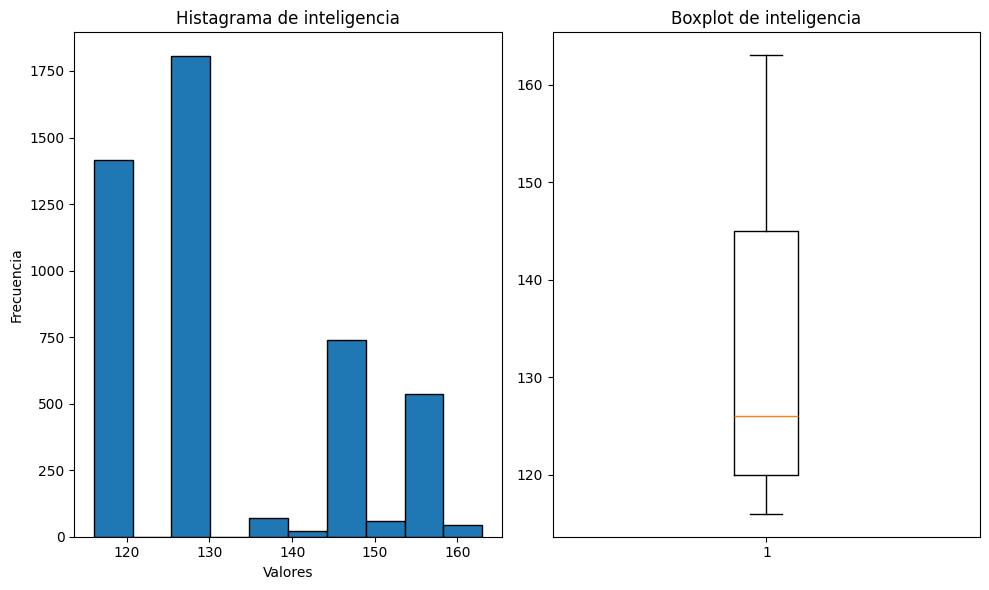

In [156]:
# Vemos los graficos de inteligencia
mostrar_graficos_numericos(df_defensa_ajustado, 'inteligencia')

Vemos su skew:

In [157]:
# Vemos el skew de inteligencia
df_defensa_ajustado['inteligencia'].skew()

np.float64(0.6338539571707941)

Dentro de nuestro rango de **no aplicar nada.** La aádimos para Robust:

In [158]:
# Añadimos inteligencia para Robust
columnas_robust.append('inteligencia')
columnas_robust

['disparo',
 'control',
 'tecnica',
 'defensa',
 'fisico',
 'velocidad',
 'inteligencia']

#### **Columna 'total'**
Entendemos este registro como `el total de puntuación (stats) de cada personaje.` En verdad, vamos a comprobar is es cierto esto:

In [159]:
# Obtenemos el total sumando todas las stats, y lo comprobamos con el total (usamos valores_unicos porque a estos no les hemos aplicado transformacion), por eso hacer copias de los df
total_datos_iguales = (df_valores_unicos[columnas_numericas[:-1]].sum(axis=1) == df_valores_unicos['total']).sum()

# Mostramos los resultados pra comparar
print(f'Datos que son iguales al total: {total_datos_iguales}')
print(f'Total de datos: {df_defensa_ajustado.shape[0]}')

Datos que son iguales al total: 4693
Total de datos: 4693


Vemos que son **datos derivados.** Veamos por último las `correlaciones entre las stats y el total:`

In [160]:
# Imprimimos las correlaciones SOLO de las numericas, viendo SOLO las del total
df_valores_unicos[columnas_numericas].corr()['total']

disparo         0.351814
control         0.379854
tecnica         0.350007
defensa         0.039665
fisico         -0.045989
velocidad       0.019362
inteligencia    0.022530
total           1.000000
Name: total, dtype: float64

Vemos correlaciones, en general, `algo significativas a excepción quizá de físico y velocidad.` Aún así, si nos vamos a quedar con el total, lo mejor es **quitarnos las demás variables, porque `puede llevar a redundancia.`** Como literalmente son las únicas columnas numéricas que tenemos, nos quedamos con ellas **descartando el total:**

In [161]:
# Quitamos total
df_sin_total = df_defensa_ajustado.drop(columns=['total'])

# Actualizamos las columnas numericas
columnas_numericas = df_sin_total.select_dtypes(include=np.number).columns
columnas_numericas

Index(['disparo', 'control', 'tecnica', 'defensa', 'fisico', 'velocidad',
       'inteligencia'],
      dtype='str')

### **Preprocesando variables categóricas**
Aquí, en especial en clústering, hay que `tener cuidado con las variables categóricas,` ya que pueden **impactar realmente en el resultado del clústering,** por ejemplo, si tenemos binarias. Analizaremos cada columna categórica, y veremos `que hacemos con cada una.`

In [162]:
# Obtenemos las variables categoricas
columnas_categoricas = df_sin_total.select_dtypes(exclude=np.number).columns
columnas_categoricas

Index(['nombre', 'juego', 'arquetipo', 'posicion_en', 'elemento_en',
       'age_group', 'genero', 'rol'],
      dtype='str')

#### **Columna 'nombre'**
Está claro que describe `los nombres de los personajes.` Claramente, **no tiene sentido quedarse con esta columna, al ser `4697 datos distintos, lo cualk lleva a una dimensionalidad absurda.`** A parte, no aporta nada, asi que lo mejor es quitarla:

In [163]:
# Quitamos la columna nombre
df_sin_nombre = df_sin_total.drop(columns=['nombre'])

# Actualizamos las columnas categoricas
columnas_categoricas = df_sin_nombre.select_dtypes(exclude=np.number).columns
columnas_categoricas

Index(['juego', 'arquetipo', 'posicion_en', 'elemento_en', 'age_group',
       'genero', 'rol'],
      dtype='str')

#### **Columna 'juego'**
Vamos a ver los valores que tiene:

In [164]:
# Mostramos los valores de juego
df_sin_nombre['juego'].unique()

<StringArray>
[          'Inazuma Eleven GO Chrono Stones: Wildfire / Thunderflash',
                                  'Inazuma Eleven GO: Light / Shadow',
                                                                  nan,
                                       'Inazuma Eleven: Victory Road',
                                                     'Inazuma Eleven',
                             'Inazuma Eleven 2: Firestorm / Blizzard',
 'Inazuma Eleven 3: Lightning Bolt / Bomb Blast / Team Ogre Attacks!']
Length: 7, dtype: str

Vemos que se nos muestra `cuando los personajes aparecieron por primera vez (videojuegos).` Creo, y por lo que me dijeron algunos jugadores, que **esto no afecta en los jugadores,** solo es informativo. Como ellos saben más que yo, podemos simplemente `cargarnos esta variable:`

Buscando en internet, estos personajes son `del juego Inazuma Eleven GO Galaxy y del Orion/Ares (fechas distintas),` así que reemplazaremos los nans segñun los personajes:

In [165]:
# Copia del df
df_sin_juego = df_sin_nombre.copy()

# Nos cargamos la columna
df_sin_juego = df_sin_juego.drop(columns=['juego'])
df_sin_juego.columns

Index(['arquetipo', 'posicion_en', 'elemento_en', 'disparo', 'control',
       'tecnica', 'defensa', 'fisico', 'velocidad', 'inteligencia',
       'age_group', 'genero', 'rol'],
      dtype='str')

Hecho esto, al ser ahora una **columna numérica,** veamos `los gráficos correspondientes:`

#### **Columna 'arquetipo'**
Vamos a ver los valores que tiene:

In [166]:
# Mostramos los valores de arquetipo
df_sin_juego['arquetipo'].unique()

<StringArray>
['Justicia', 'Brecha', 'Afinidad', 'Contraataque', 'Juego Sucio', 'Tensión',
 nan]
Length: 7, dtype: str

Vemos que es una columna `categórica nominal,` es decir, que no **tiene relación de orden para poder reemplazarlo,** es puramente aplicable para one-hot encoding. A estas variables, como estamos **explorando a los jugadores,** es mejor `descartarla y usarla a la hora de tener los clústers,` así podemos ver algunos datos de los clústers con relación a esta variable:

In [167]:
# Lista con las columnas nominales
columnas_nominales = list()

# Aniadimos a 'arquetipo'
columnas_nominales.append('arquetipo')
columnas_nominales

['arquetipo']

#### **Columna 'posicion_en'**
Esta columna contiene `las posiciones PRINCIPALES de los jugadores en el campo,` ya que pueden tener otra posición posible. Vamos a descartar esta columna uy la usaremos para analizar **los resultados del clústering,** ya que nos ayudará a entender `los clústers formados:`

In [168]:
# Copia del df
df_sin_posicion = df_sin_juego.copy()

# Quitamos la columna
df_sin_posicion = df_sin_posicion.drop(columns=['posicion_en'])

# Actualizamos las columnas categoricas
columnas_categoricas = df_sin_posicion.select_dtypes(exclude=np.number).columns
columnas_categoricas

Index(['arquetipo', 'elemento_en', 'age_group', 'genero', 'rol'], dtype='str')

#### **Columna 'elemento_en'**
Esta columna contiene `el elemento al que pertenece un jugador (único).` Al igual que 'arquetipo', **vamos a usar solo esta columna a la hora de los resultados del clústering,** ya que permitirá ver `información de los clústers:`

In [169]:
# Agregamos la columna a las nominales puras
columnas_nominales.append('elemento_en')
columnas_nominales

['arquetipo', 'elemento_en']

#### **Columna 'age_group'**
Veamos los valores para ver que nos describe:

In [170]:
# Vemos los valores de age_group
df_sin_posicion['age_group'].unique()

<StringArray>
[     'Exobeing', 'Middle School',             nan,         'Elder',
         'Adult',    'Elementary',   'High School',       'College']
Length: 8, dtype: str

Se puede ver que nos dice `el grupo de edad (entiendo) relativo al que pertenecen los personajes.` Podemos ver que puede seguir un orden relativo, asi que, podriamos `ponerles valor relativo a cada escala,` si no fuera por este factor: **Exobeiring.** Esta categoria se refiere a los `personajes no humanos,` por lo cual, **rompe la escala relativa.** Debido a esto, tenemos 2 opciones:
- O ponemos a los 'Exobeing' a nan e imputar por la mediana.
- O más limpio, `usar esta variable para interpretar los resultados del clústering.`

Me decanto por esta última opción, ya que `evita meter un posible ruido` que podría arruinar los clústers:

In [171]:
# Aniadimos esta columna a las nominales puras
columnas_nominales.append('age_group')
columnas_nominales

['arquetipo', 'elemento_en', 'age_group']

#### **Columna 'genero'**
Se ve claramente que `nos dije el género de cada personaje.` Por razones claras, **no se incluirá a la hora del clústering,** y solo se usará para evaluar los resultados (una binaria puede dominar en el clústering):

In [172]:
# Aniadimos esta columna a las nominales puras
columnas_nominales.append('genero')
columnas_nominales

['arquetipo', 'elemento_en', 'age_group', 'genero']

#### **Columna 'rol'**
Aunque sabemos que nos dice `los roles de cada personaje,` veamos los datos para estar más seguros:

In [173]:
# Vemos los valores de rol
df_sin_posicion['rol'].unique()

<StringArray>
['Player', nan, 'Coordinator', 'Manager', 'Coach', '0']
Length: 6, dtype: str

Como nos dice **si los personajes son jugadores, managers, entrenadores o coordinadores,** será de más utilidad al `analizar los resultados del clústering.` Por ello, lo incluimos en las nominales:

In [174]:
# Aniadimos esta columna a las nominales puras
columnas_nominales.append('rol')
columnas_nominales

['arquetipo', 'elemento_en', 'age_group', 'genero', 'rol']

#### **Explicación: ¿Por qué excluimos casi todas las categóricas?**
Esto es porque estas categóricas, en su mayoria, `no tienen relación ordinal,` lo cual implica tratarlas con un One-hot encoding. Al crear muchas columnas binarias, aparecen estos 2 problemas:
- Creamos una `dimensionalidad extremádamente alta,` lo cual no beneficia nada al clústering (y recordemos que no tenemos manera de hacer **feature selecction, como mucho, reducción de dimensionalidad**).
- Las variables binarias `suelen dominar el clústering al no tener sentido en las distancias.` Al ser del tipo 'SI/NO', puede variar **drásticamente a la hora de hacer los clústers.**

Por estas razones, y estando `en un análisis exploratorio,` lo mejor es usarlas **solo a la hora de tener los clústers hechos.**

Aclarado esto, vamos a dejar el dataframe que vamos a usar, no sin antes **comprobar por seguridad `si existen jugadores con stats a 0 (sucios), ya que, puede pasar y ensucia los datos:`**

In [175]:
# Copia del df
df_columnas_finales = df_sin_posicion.copy()

# Excluimos las variables nominales 'puras'
df_columnas_finales = df_columnas_finales.drop(columns=columnas_nominales)

# Mostramos el df final
print(f'Columnas finales: {df_columnas_finales.columns}')

Columnas finales: Index(['disparo', 'control', 'tecnica', 'defensa', 'fisico', 'velocidad',
       'inteligencia'],
      dtype='str')


### **Aplicando el escalado correcto**
Terminada la fase de `análisis de cada columna numérica,` es tiempo de aplicar el **escalado correcto.** Aunque es verdad que ya hemos explicado qué vamos a usar, es bueno describir `por qué no usaremos otros escalados:`
- No usamos `StandardScaler` ya que queremos **conservar la forma de la 'caja' (la mayoria de la población),** ya que es lo que más información útil puede aportar (Standard se ve sesgado por estos atípicos que no lo son al usar la media y la desviación estándar).
- Podríamos usar `MinMax,` ya que este **conserva la 'forma' de la distribución (encoge los datos).** En inconveniente es que, tenemos `outliers significativos,` lo cual puede afectar a la hora de aplicar el MinMax (disminuir drásticamente las 'distancias'). Si tuviéramos bimodales o más, sin muchos atípicos, sería el **escalado perfecto,** pero este no es el caso.
- Aunque ya lo dijismo, `RobustScaler,` al usar tanto **la mediana como el rango intercuantílico (percentil 75 - percentil 25),** hace que `no se vea afectado por los atípicos, incluso cuando son unos cuantos.`

Con esta aclaración, procedemos a aplicar RobustScaler:

In [176]:
# Libreria a usar
from sklearn.preprocessing import RobustScaler

In [177]:
# Copia del df (siempre ayuda, ya lo vimso antes)
df_numericas_preprocesadas = df_columnas_finales.copy()

# Aplicamos Robust a nuestras columnas
df_numericas_preprocesadas[columnas_robust] = RobustScaler().fit_transform(df_numericas_preprocesadas[columnas_robust])

# Mostramos los nuevos datos
df_numericas_preprocesadas[columnas_numericas].describe()

,disparo,control,tecnica,defensa,fisico,velocidad,inteligencia
count,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000
mean,-0.001607,-0.326363,-0.017357,0.105436,0.243927,0.577882,0.210202
std,0.504788,0.496919,0.558651,0.491215,0.478806,1.533993,0.505915
min,-0.571429,-1.068966,-0.833333,-0.478632,-0.321429,-0.500000,-0.400000
25%,-0.457143,-0.862069,-0.583333,-0.478632,-0.321429,-0.500000,-0.240000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.542857,0.137931,0.416667,0.521368,0.678571,0.500000,0.760000
max,1.228571,0.689655,1.458333,1.383547,1.178571,5.750000,1.480000


Aunque vemos que `hay distintos rangos entre las columnas (en especial velocidad),` vemos que **son comparables,** en el sentido que no hay valores `muy dispares.` Con esto, hemos **terminado la fase del `preprocesado de datos.`**

## **'Selección' de características'**
Esto lo tomamos con pinzas, ya que `no tenemos variable objetivo,` lo cual limita las opciones. Como mucho, podemos **ver las correlaciones entre variables,** y eliminar las columnas `con correlaciones altas:`

In [178]:
# Funcion para mirar de mejor manera las correlaciones entre cada variable
def mostrar_correlaciones_variables(df: pd.DataFrame, umbral: float=0.5):

    # Obtenemos las correlaciones
    correlaciones = df.corr()
    
    # Nos quedamos solo con los resultados que estan encima de la diagonal de '1s'
    mascara_correlaciones = np.triu(np.ones_like(correlaciones, dtype=bool), k=1)
    
    # Obtenemos las correlaciones entre variables
    correlaciones = correlaciones.where(mascara_correlaciones).stack().sort_values(ascending=False)
    
    # Mostramos las que esten por encima de un umbral
    return correlaciones[correlaciones > 0.5]

In [179]:
# Mostramos las que esten por encima de un umbral
mostrar_correlaciones_variables(df_numericas_preprocesadas)

defensa  fisico          0.976781
control  tecnica         0.923350
disparo  control         0.873286
defensa  inteligencia    0.721625
fisico   velocidad       0.662436
disparo  tecnica         0.659715
fisico   inteligencia    0.630685
defensa  velocidad       0.554619
dtype: float64

Vemos algo muy claro: Hay columnas `que explican lo mismo, y por eso la correlación entre ellas es demasiado alta (casi 1).` Nos podemos cargar las variables con correlaciones demasiado altes, pero, ¿Y qué hacemos con las demás, si la correlación es alta también?

Buscando en internet, me di cuenta que **es normal esto** ya que en videojuegos, hay un factor llamado `calidad,` el cual hace que algunos jugadores sean **buenos en todo y otros, malos en todo.** Debido a ello, vi que se suele usar estos thresholds:
- Correlaciones `mayores o iguales a 0.85,` es necesario **deshacerse de una de ellas** o **intentamos crear una nueva característica.**
- Correlaciones `entre 0.85 y 0.75,` depende de nuestro dominio si son `explicables independientemente o no (tipo, si aunque estén correlacionadas, una explique algo importantísimo que otra no lo haga).` 
- Correlaciones `menores a 0.75,` podemos **conservarlas sin problemas.**

Con esto, viendo que tenemos `solo el primer y tercer caso,` vamos a intentar hacer feature engineer, pero de una manera algo más 'peculiar':
- `Control y técnica:` Probaremos crear la feature **calidad_tecnica,** la cual refleja si el jugador tienen `buen control del balón y tiene buena técnica, lo cual es lo normal en fútbol.`
- `Defensa y físico:` Probaremos crear una nueva feature llamada **calidad_defensiva,** ya que las variables indican que `explican lo mismo, por lo tanto, podemos aprovecharlas haciendoles media.`
- Veremos si ahora disparo tiene `correlación alta con estas nuevas features.`

Con estas nuevas features, veremos las nuevas correlaciones:

In [180]:
# Copia del df
df_nuevas_columnas = df_columnas_finales.copy()

# Creamos la columna 'calidad_defensiva', que sera la media entre fisico y velocidad
df_nuevas_columnas['calidad_defensiva'] = (df_nuevas_columnas['fisico'] + np.sqrt(df_nuevas_columnas['defensa'])) / 2  # Porque le aplicamos potencia a defensa

# Creamo la columna 'calidad_tecnica'
df_nuevas_columnas['calidad_tecnica'] = (df_nuevas_columnas['control'] + df_nuevas_columnas['tecnica']) / 2

# Quitamos ambas variables
df_nuevas_columnas = df_nuevas_columnas.drop(columns=['fisico', 'defensa', 'control', 'tecnica'])
df_nuevas_columnas

,disparo,velocidad,inteligencia,calidad_defensiva,calidad_tecnica
0,140,119,145,121.0,161.5
1,169,119,130,121.0,154.0
2,169,119,130,121.0,154.0
3,169,119,130,121.0,154.0
4,169,119,130,121.0,154.0
...,...,...,...,...,...
4688,116,119,149,135.5,121.5
4689,145,105,126,111.0,134.0
4690,145,105,126,111.0,134.0
4691,130,109,135,111.0,151.5


Veamos rápidamente los datos estadísticos de `calidad_defensiva:`

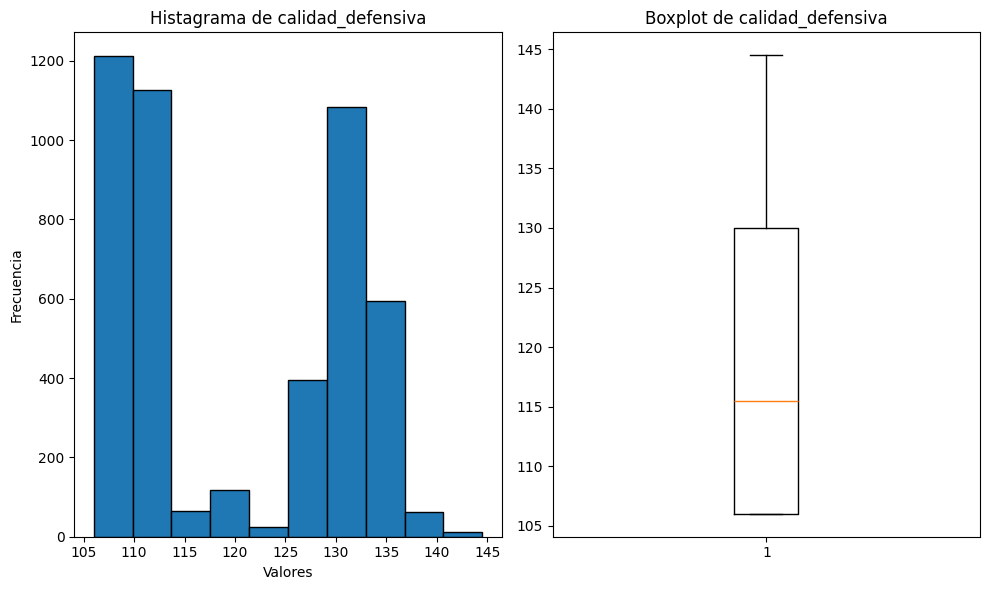

np.float64(0.10114029394257258)

In [181]:
# Mostramos graficos
mostrar_graficos_numericos(df_nuevas_columnas, 'calidad_defensiva')

# Mostramos skew
df_nuevas_columnas['calidad_defensiva'].skew()

Como el skew es aceptable, lo dejamos.

Veamos ahora el de `calidad_tecnica:`

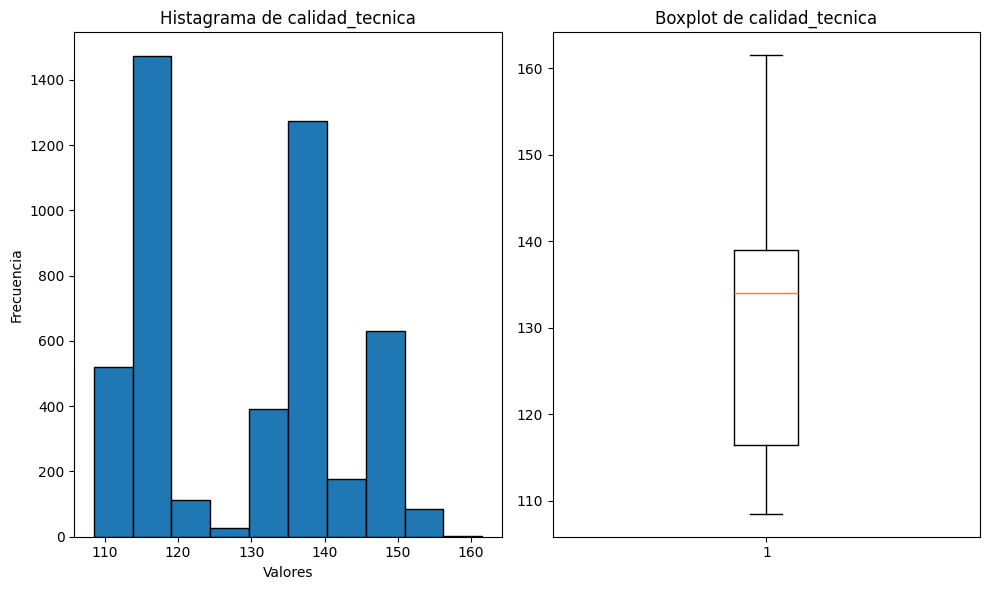

np.float64(-0.09591726293098284)

In [182]:
# Mostramos graficos
mostrar_graficos_numericos(df_nuevas_columnas, 'calidad_tecnica')

# Mostramos skew
df_nuevas_columnas['calidad_tecnica'].skew()

Pasa lo mismo: Lo podemos dejar así.

Por último, miremos las nuevas correlaciones:

In [183]:
# Mostramos las que esten por encima de un umbral
mostrar_correlaciones_variables(df_nuevas_columnas)

disparo       calidad_tecnica      0.785530
inteligencia  calidad_defensiva    0.668323
velocidad     calidad_defensiva    0.624171
dtype: float64

Ahora, las correlaciones que tenemos `no son extremas (casi 1),` aunque es verdad que todavía hay correlaciones algo altas. Pero como vimos que es algo `normal dentro de **los videojuegos,**` podemos conservar las variables (a parte que al ser la correlación más alta con la nueva variable que creamos, a lo mejor puede que explique cosas más distintas que con ambas separadas).

Por último, vamos a escalar de nuevo nuestra variables:

In [184]:
# Copia del df
df_clustering = df_nuevas_columnas.copy()

# Instanciamos a robust porque luego lo necesitaremos para interpretar resultados
robust_scaler = RobustScaler()

# Escalamos las variables
df_clustering[df_clustering.columns] = robust_scaler.fit_transform(df_clustering)

# Vemos con describe algunos datos estadisticos
df_clustering.describe()

,disparo,velocidad,inteligencia,calidad_defensiva,calidad_tecnica
count,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000
mean,-0.001607,0.577882,0.210202,0.177743,-0.219580
std,0.504788,1.533993,0.505915,0.477099,0.606238
min,-0.571429,-0.500000,-0.400000,-0.395833,-1.133333
25%,-0.457143,-0.500000,-0.240000,-0.395833,-0.777778
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.542857,0.500000,0.760000,0.604167,0.222222
max,1.228571,5.750000,1.480000,1.208333,1.222222


Dentro de todo, están en `rangos comparables.` Solo queda ver si ya no tenemos nulos:

In [185]:
# Vemos si hay nulos
df_clustering.isna().sum().sum()

np.int64(0)

Con 0 nulos, podemos decir que `hemos terminado la fase de 'Feature selection'.` Ahora si, tenemos el dataset listo para aplicarlo algoritmos de clústering.

## **Aplicando algoritmos de clústering**
Terminada la fase de preprocesado y sleección de características, vamos a probar distintos algoritmos de clústering, como el jerárquico, particional, de densidad, y algún otro con tal de `comprobar los distintos resultados de los distintos algoritmos.` Voy a dejar unas aclaraciones antes, ya que servirán a la hora de entender los resultados:
- La comunidad ha descubierto que los creadores del juego `no han creado 5000 plantillas para cada jugador,` sino que **crearon aproximádamente entre `20 y 30,` las cuales estás `distribuidas entre todos los jugadores.`**
- En teoría, solo hay `4 posiciones posibles.` Aunque en teoría, un jugador puede ocupar bien **varias posiciones.**
- Para el competitivo, encontrar `jugadores versátiles u OP` es fundamental.

Dicho esto, comenzamos con el `clústering jerárquico (por gusto personal).`

### **Clústering jerárquico**
Basado en 2 tipos: `bottom-up y top-down.` Consiste en **agrupar puntos o clústers según distancias (por ejemplo, calculando la distancia entre los puntos más cercanos o alejados entre clústers).** Se puede ver el proceso de agrupamiento del algoritmo mediante `un dendrograma.`

Para nuestro caso, usaremos el **AgglomerativeClustering,** el cual es `bottom-up (cada punto es un clúster, intentando fusionarlos hasta tener los que pidamos).` Probaremos asignar unos cuantos clústers y ver que resultado nos da. Para ello, seguiremos lo siguiente:
- Tenemos `4 posiciones en el campo.` Este será nuestro punto de partida.
- En teoría, solo hay `30 plantillas.` Probaremos el clúster 31 para confirmar esto.
- Nuestro rango a probar, será entonces `[4, 31].`

Dicho esto, es importante `definir el tipo de distancia a usar,` ya que esto hará que **varien posiblemente los resultados.** Usaremos en concreto 2:
- `Ward:` El cuál, aplicado solo mediante **la distancia euclídea,** se basa `en la varianza de los clústers.` Es decir, que si agregando un clúster, la nueva varianza es la menor (comparado al añadir los demás clústers), se `hace el agrupamiento.` Es el que suele funcionar mejor en la industria, por ello el primero a probar.
- `Average cosine:` El cual, mediante la **distancia promedio entre cada punto de cada clúster,** se usa la distancia coseno, una muy usada por ejemplo, `en búsqueda de vectores similares.` Puede ser una buena idea al tener una dimensión de 5.

Dicho esto, vamos a probar primero ward, sin antes primero preparar `el entorno de pruebas:`

In [186]:
# Libreria a usar
from sklearn.cluster import AgglomerativeClustering

In [187]:
# Funcion que aplica el algoritmo de clustering segun parametros
def aplicar_clustering_aglomerativo(df: pd.DataFrame, n_cluster: list, distancia: str='euclidean', link: str='ward'):

    # Copia del df
    df_agglomerative = df.copy()

    # Columnas con el resultado de los clusters
    columnas_clusters = list()

    # Bucle segun el numero de clusters
    for cluster in n_cluster:

        # Aplicamos el algoritmo
        resultado_cluster = AgglomerativeClustering(n_clusters=cluster, metric=distancia, linkage=link).fit_predict(df)

        # Nombre de la columna con el resultado
        nombre_columna_cluster = f'{cluster:02d}_clusters'

        # Añadimos el resultado al df
        df_agglomerative[nombre_columna_cluster] = resultado_cluster

        # Añadimos la columna a la lista de columnas
        columnas_clusters.append(nombre_columna_cluster)

    # Devolvemos el df con los resultados y las columnas con los resultados del cluster
    return df_agglomerative, columnas_clusters

In [188]:
# Clusters a probar
n_clusters = np.arange(4, 32)

#### **Usando euclidean-ward**
Como dijimos, es el que `suele funcionar casi siempre bien, siendo el más usado.` Para ello, configuramos el algoritmo para que aplique dichas distancias:

In [189]:
# Aplicamos el algoritmo para la ward (demora casi 20 segundos)
df_ward, columnas_cluster_ward = aplicar_clustering_aglomerativo(df_clustering, n_clusters)
df_ward

,disparo,velocidad,inteligencia,calidad_defensiva,calidad_tecnica,04_clusters,05_clusters,06_clusters,07_clusters,08_clusters,...,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters,28_clusters,29_clusters,30_clusters,31_clusters
0,0.400000,1.25,0.76,0.229167,1.222222,0,4,4,4,1,...,6,6,6,6,2,0,2,0,29,29
1,1.228571,1.25,0.16,0.229167,0.888889,0,4,4,4,1,...,19,19,19,19,19,19,19,19,19,19
2,1.228571,1.25,0.16,0.229167,0.888889,0,4,4,4,1,...,19,19,19,19,19,19,19,19,19,19
3,1.228571,1.25,0.16,0.229167,0.888889,0,4,4,4,1,...,19,19,19,19,19,19,19,19,19,19
4,1.228571,1.25,0.16,0.229167,0.888889,0,4,4,4,1,...,19,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,-0.285714,1.25,0.92,0.833333,-0.555556,2,2,0,6,6,...,18,18,18,18,18,18,18,18,18,18
4689,0.542857,-0.50,0.00,-0.187500,0.000000,0,0,2,2,2,...,13,13,13,13,13,6,6,6,6,6
4690,0.542857,-0.50,0.00,-0.187500,0.000000,0,0,2,2,2,...,13,13,13,13,13,6,6,6,6,6
4691,0.114286,0.00,0.36,-0.187500,0.777778,0,4,4,4,1,...,7,7,3,3,3,3,3,3,3,3


Con los resultados obtenidos, vamos a 'evaluar' si los clústers `están bien formados.` Para ello, nos basaremos en la métrica **silhouette,** ya que esta `mira si los puntos deben de pertenecer a su clúster o al más cercano.` Probaremos también a **Davies-bouldin,** ya que este `mira y compara la distancia interna en los clústers (intra-clúster) y la externa entre clústers (inter-clúster).` Un silueta alto (va entre -1 y 1), indica `que los puntos están bien agrupados y que pertenecen a sus clústers asignados (-1 indica lo contrario).` Un Davies bajo indica `que los clústers están bien diferenciados.` Dicho esto, vamos a evaluar ambos scores:

In [190]:
# Librerias a usar
import matplotlib.pyplot as plt

In [191]:
# Funcion para graficar la evolucion de los scores a traves de un grafico
def calcular_scores_graficar(df: pd.DataFrame, columns_cluster: list, score_func):

    # Lista con los resultados
    resultados_score_cluster = list()

    # Bucle para calcular cada score
    for cluster in columns_cluster:

        # Calculamos el score
        score = score_func(df.drop(columns=columns_cluster), df[cluster])

        # Guardamos
        resultados_score_cluster.append(score)

    # Definimos el lienzo
    plt.figure(figsize=(12, 6))

    # Graficamos
    plt.plot([f'{cluster[:2]}' for cluster in columns_cluster], resultados_score_cluster, color='blue', marker='o')
    plt.xlabel('Nº clusters')
    plt.ylabel('Score')
    plt.title(f'Resultados para {score_func.__name__}')

    # Mostramos
    plt.grid(True)
    plt.show()

    # Obtenemos la posicion del score mas alto (para silueta) y bajo (para davies)
    pos_score_alto = np.argmax(resultados_score_cluster)
    pos_score_bajo = np.argmin(resultados_score_cluster)

    # Imprimimos los scores
    print(f'Score mas alto para {score_func.__name__}: {columns_cluster[pos_score_alto]} - {resultados_score_cluster[pos_score_alto]:.2f}')
    print(f'Score mas bajo para {score_func.__name__}: {columns_cluster[pos_score_bajo]} - {resultados_score_cluster[pos_score_bajo]:.2f}')

In [192]:
# Librerias a usar
from sklearn.metrics import silhouette_score, davies_bouldin_score

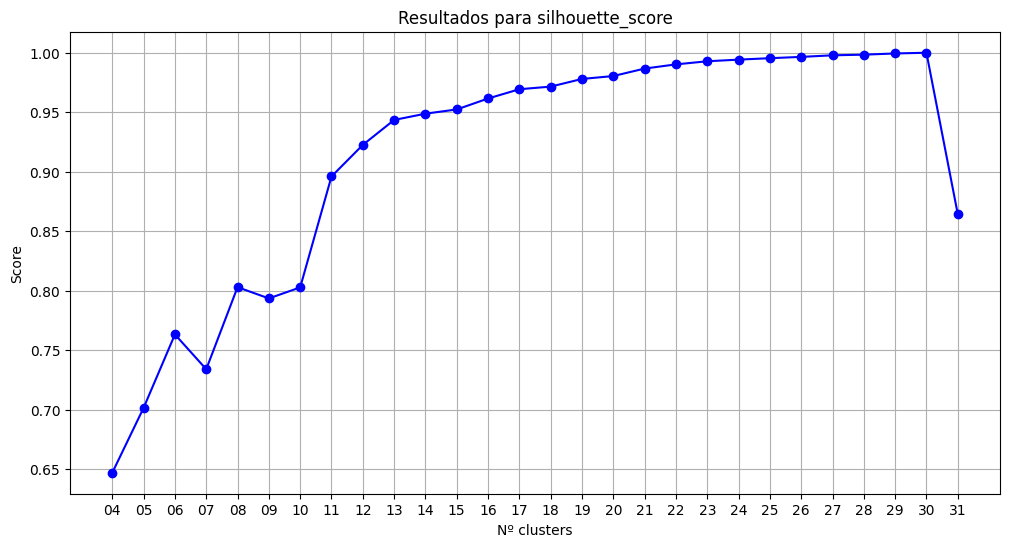

Score mas alto para silhouette_score: 30_clusters - 1.00
Score mas bajo para silhouette_score: 04_clusters - 0.65


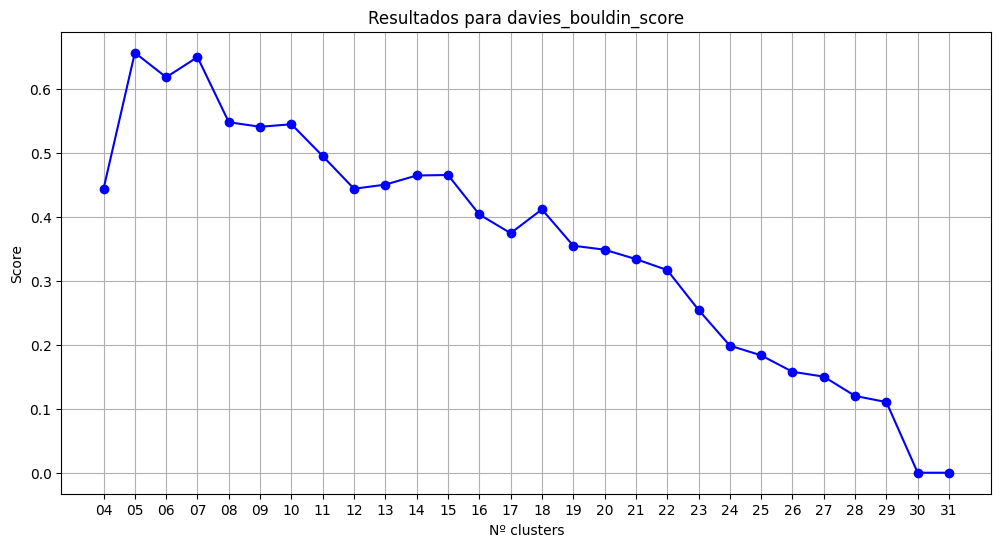

Score mas alto para davies_bouldin_score: 05_clusters - 0.66
Score mas bajo para davies_bouldin_score: 31_clusters - 0.00


In [193]:
# Graficamos el resultado del score de silueta
calcular_scores_graficar(df_ward, columnas_cluster_ward, silhouette_score)

# Y el de  Davies
calcular_scores_graficar(df_ward, columnas_cluster_ward, davies_bouldin_score)

Con esto, podemos sacar las siguientes observaciones:
- Silueta nos dice que `cada punto de cada clúster esta bien 'asignado' si nos vamos a 30 clústers.`
- Lo mismo nos dice Davies, en el sentido que `cada clúster está bien denso y bien separado de los demás (otra vez con 30, aunque también con 31, lo cual es curioso).`
- Esto confirma la 'hipótesis' del inicio: **Si hay `30 plantillas predefinidas en el juego.`**
- Otra cosa que también podemos ver, es que, con silueta, con **7 y 9 clústers, se ve `una caida, lo cual indica peor 'rendimiento'.`**
- Con silueta, vemos también una gran mejora con `6, 8 y 11 clústers.`
- Con Davies, vemos al contrario, **subidas con `5, 7, 10, 13, 14, y 18 clústers,` lo cual indica de nuevo 'peor rendimiento'.**
- Al contrario, vemos una mejora notable en Davies con `8 clústers.`

Dicho esto, vamos a evaluar que pasa con `7 y 8 clústers,` ya que con 7 tenemos **los peores scores,** mientras que con 8, se ve una **mejora notable del score.** Para ello, haremos uso de un diagrama importante (a parte del análisis de resultados posterior):
- El `dendrograma,` que nos permitirá observar **como se han fusionado los clústers.**

Con esto, vamos a generar el dendrograma:

In [194]:
# Librerias a usar
from scipy.cluster.hierarchy import dendrogram, linkage

In [195]:
# Funcion que dibuja los dendrogramas
def dibujar_dendrograma(df: pd.DataFrame, num_cluster: list=[7, 8], distancia: str='euclidean', link='ward'):

    # Hacemos el lienzo
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Calculamos la matriz de enlaces 
    enlaces = linkage(df, metric=distancia, method=link)

    # Bucle para cada numero de cluster
    for i, cluster in enumerate(num_cluster):
        
        # Hacemos el dendrograma
        dendrogram(enlaces, truncate_mode='lastp', p=cluster, show_leaf_counts=True, show_contracted=True, ax=axes[i])
    
        # Ponemos titulo y ejes
        axes[i].set_xlabel('Numero de clusters')
        axes[i].set_ylabel('Distancias')
        axes[i].set_title(f'Dendrograma Simplificado para {cluster} clusters')

    # Mostramos todo
    plt.tight_layout()
    plt.show()

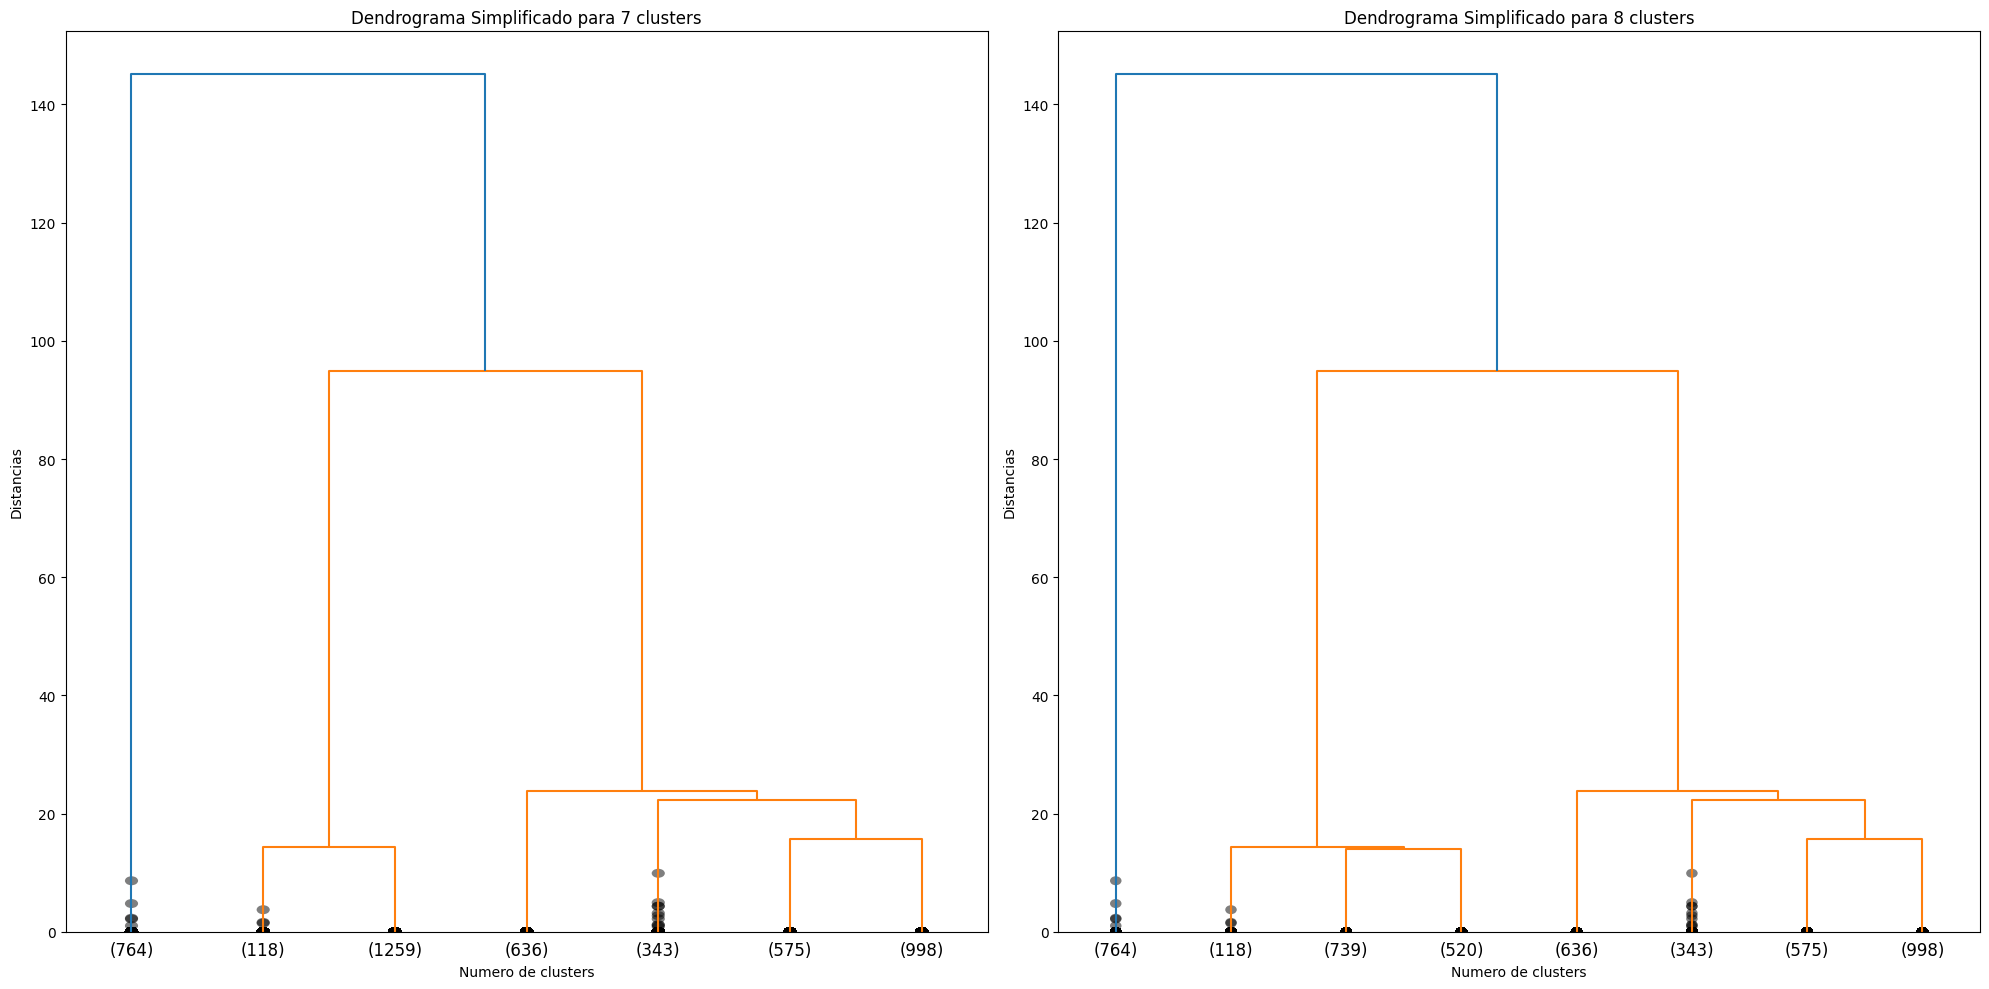

In [196]:
# Dibujamos los dendrogramas
dibujar_dendrograma(df_clustering)

Con esto, ya podemos ver por qué `7 clústers daban malos scores:`
- Con 7, a primera vista, vemos `clústers que tardan en fusionarse.` Esto quiere decir que están **bien separados.**
- Pero al hacer 8, vemos el engaño: `existen 2 clústers que están bien diferenciados (el de 739 y el de 520),` pero con 7 clústers, el algoritmo se ve obligado **a fusionarlos.**

Esto explica los malos scores, ya que perdemos `2 clústers bien diferenciados.`

Para pasar con el otro algoritmo (probando la distancia coseno), vamos a dejar los resultados de los clústers que vamos a comprobar:

In [197]:
# Nos quedamos con 4 (para ver si de casualidad separamos bien las '4 posiciones'), 8 (al ser la mejor 'mejoria' de scores) y 30 (para ver las stats de las distintas platillas)
df_ward_final = df_ward[['04_clusters', '08_clusters', '30_clusters']].copy()
df_ward_final

,04_clusters,08_clusters,30_clusters
0,0,1,29
1,0,1,19
2,0,1,19
3,0,1,19
4,0,1,19
...,...,...,...
4688,2,6,18
4689,0,2,6
4690,0,2,6
4691,0,1,3


#### **Usando average-cosine**
Para ver si los resultados cambian, usaremos la distancia `coseno,` la cual funciona muy bien a la hora de ver **vectores similares.** Usaremos la distancia promedio, ya que es más fiable que usar o la más lejana o la más cercana.

Iremos más rápido ya que ahora solo es probar y ya:

In [198]:
# Aplicamos el algoritmo para cosine (demora poco)
df_coseno, columnas_cluster_coseno = aplicar_clustering_aglomerativo(df_clustering, n_clusters, distancia='cosine', link='average')
df_coseno

,disparo,velocidad,inteligencia,calidad_defensiva,calidad_tecnica,04_clusters,05_clusters,06_clusters,07_clusters,08_clusters,...,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters,28_clusters,29_clusters,30_clusters,31_clusters
0,0.400000,1.25,0.76,0.229167,1.222222,2,0,2,0,4,...,19,19,19,19,19,19,19,19,19,19
1,1.228571,1.25,0.16,0.229167,0.888889,2,0,2,0,3,...,11,11,11,24,24,24,24,24,24,24
2,1.228571,1.25,0.16,0.229167,0.888889,2,0,2,0,3,...,11,11,11,24,24,24,24,24,24,24
3,1.228571,1.25,0.16,0.229167,0.888889,2,0,2,0,3,...,11,11,11,24,24,24,24,24,24,24
4,1.228571,1.25,0.16,0.229167,0.888889,2,0,2,0,3,...,11,11,11,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,-0.285714,1.25,0.92,0.833333,-0.555556,1,4,4,4,1,...,3,3,1,0,4,4,4,4,4,4
4689,0.542857,-0.50,0.00,-0.187500,0.000000,0,2,0,6,6,...,15,15,15,15,15,15,15,15,15,15
4690,0.542857,-0.50,0.00,-0.187500,0.000000,0,2,0,6,6,...,15,15,15,15,15,15,15,15,15,15
4691,0.114286,0.00,0.36,-0.187500,0.777778,2,0,5,2,2,...,10,10,10,10,10,10,10,10,10,10


Veamos ahora los scores:

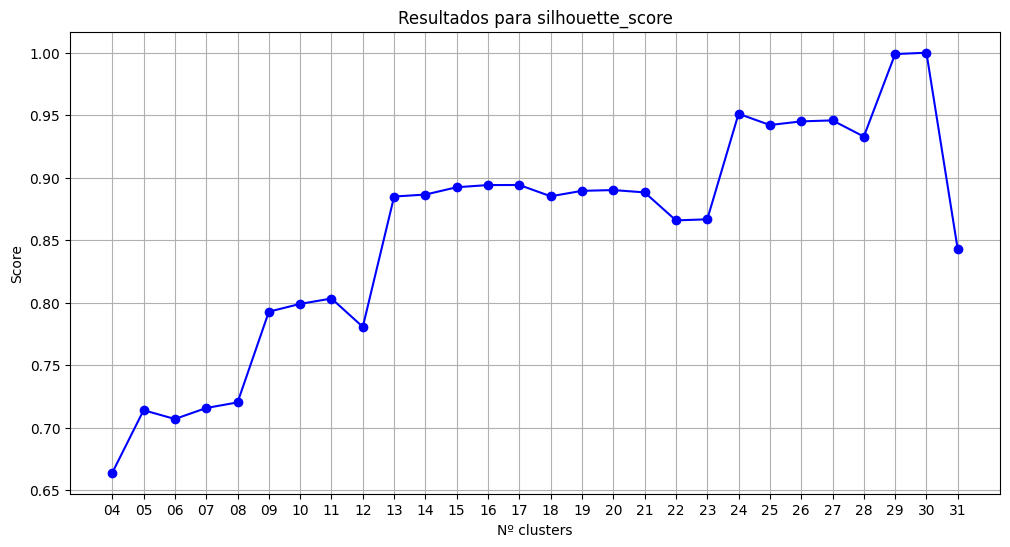

Score mas alto para silhouette_score: 30_clusters - 1.00
Score mas bajo para silhouette_score: 04_clusters - 0.66


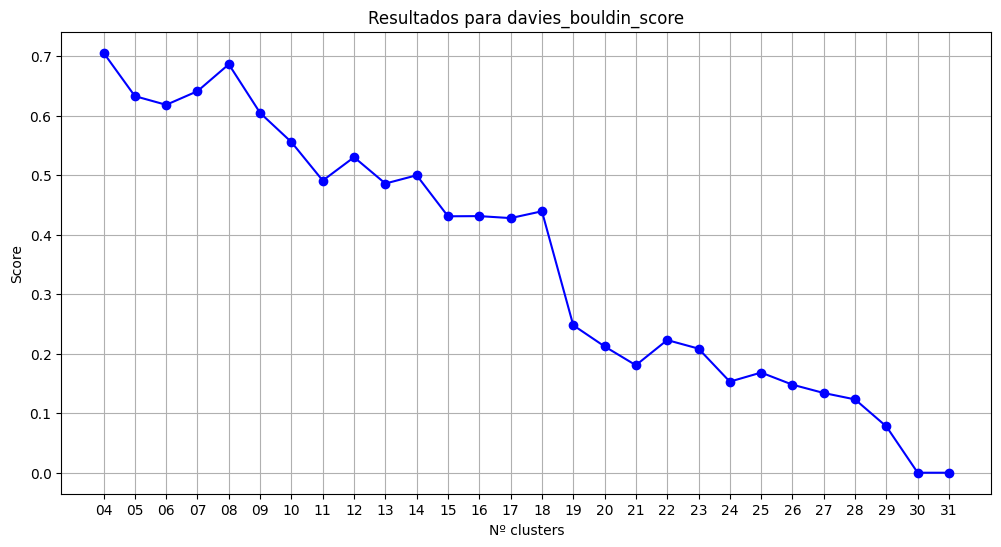

Score mas alto para davies_bouldin_score: 04_clusters - 0.71
Score mas bajo para davies_bouldin_score: 31_clusters - 0.00


In [199]:
# Graficamos el resultado del score de silueta
calcular_scores_graficar(df_coseno, columnas_cluster_coseno, silhouette_score)

# Y el de Davies
calcular_scores_graficar(df_coseno, columnas_cluster_coseno, davies_bouldin_score)

Similar al análisis con ward:
- Se confirma lo de las `30 plantillas predefinidas.`
- Con `silueta,` no hay **caidas notorias del score,** como mucho, en `12 y en 22.`
- En cambio, si vemos `mejoras notorias del score,` aunque **no son los mismos qeu con ward.** Tenemos las mejoras con `9, 13 y 24 clústers.`
- Con Davies, vemos `caidas poco notorias (subida del score),` como mucho, en `8, 12 y 22.`
- Subidas notorias con Davies, destaca `9, 15 y 19.`

Con esto, miraremos que pasa con `8 y 9 clústers` a través de **los dendrogramas:**

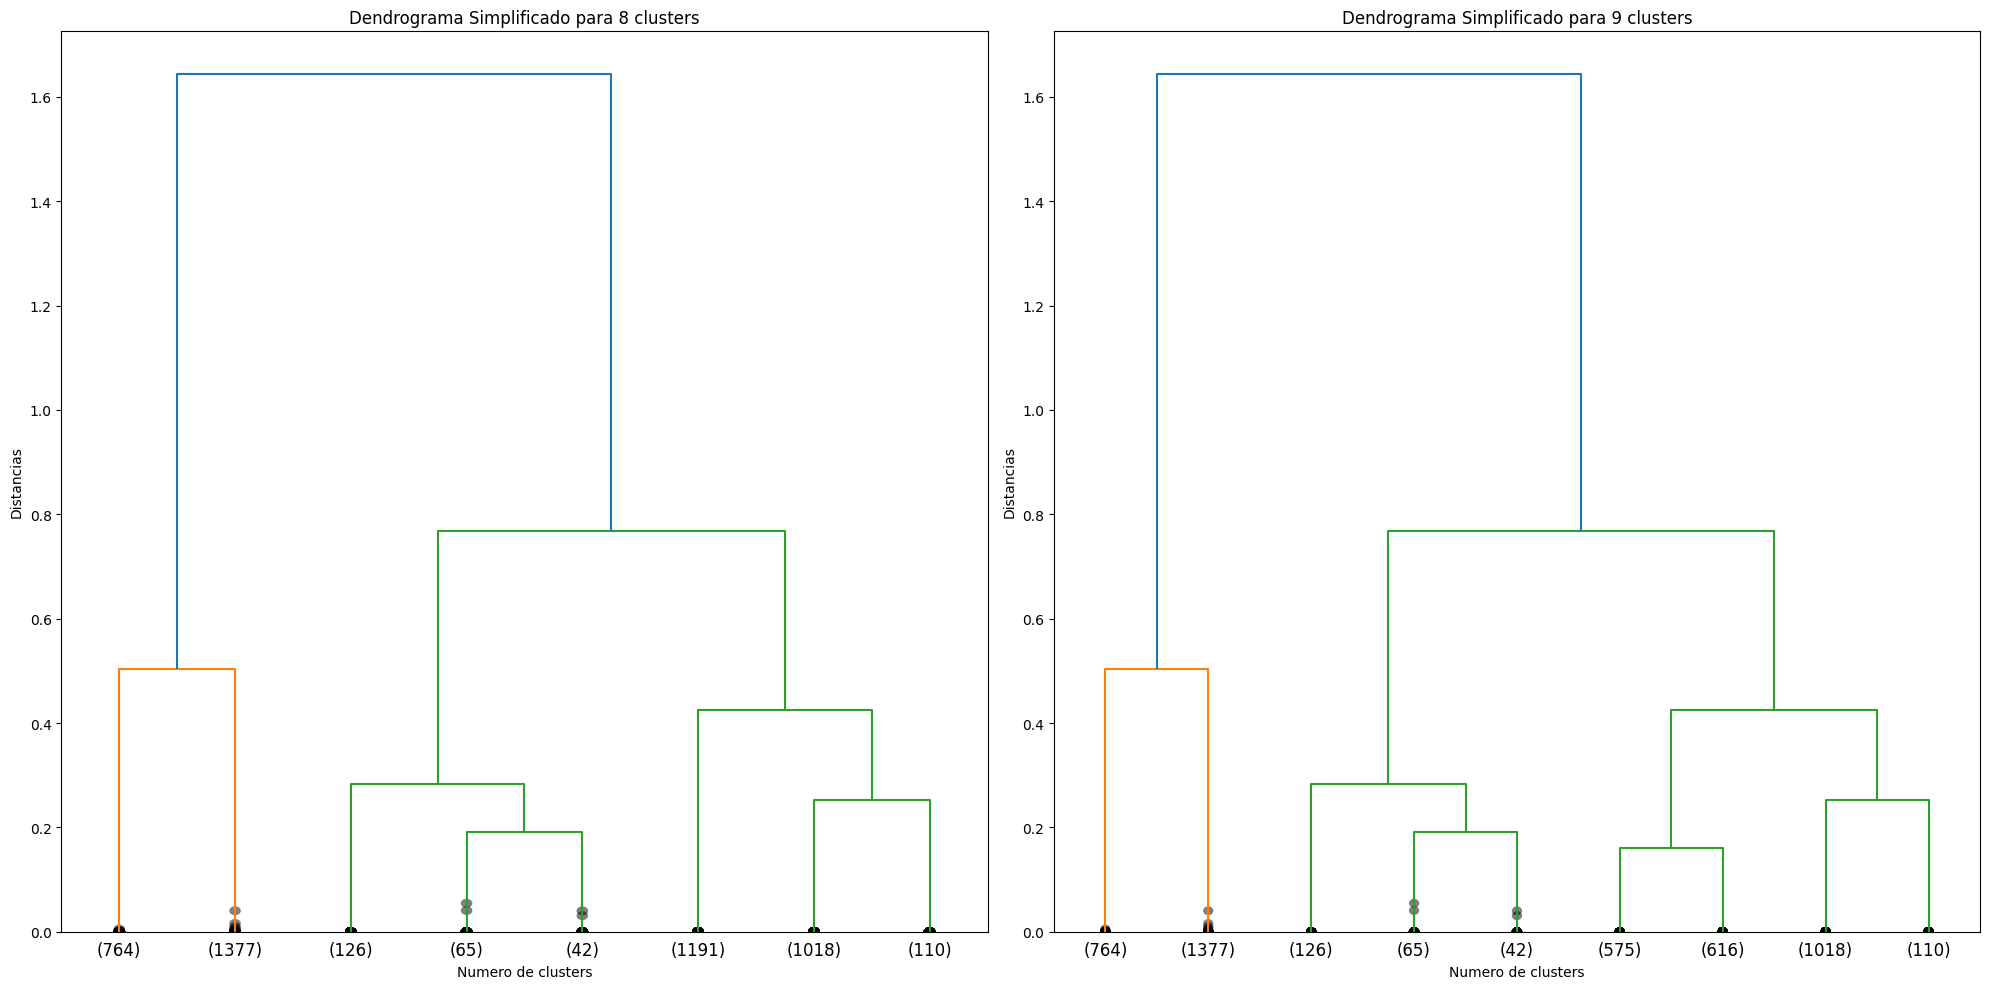

In [200]:
# Dibujamos los dendrogramas
dibujar_dendrograma(df_clustering, num_cluster=[8, 9], distancia='cosine', link='average')

Aquí el análisis es más interesante:
- Con `8 clústers,` vemos que el dendrograma indica que **son consistentes, ya que `no se fucionan muy pronto (poca distancia).`
- Con `9 clústers,` vemos que el clúster con 1191 **se divide en 2 clústers.** Es verdad que estos logran fusionarse más rápido (viven menos), pero a lo mejor la subida del score se debe a que los clústers nuevos `están bien densos (distancia intra-clúster pequeña).`

Para terminar, vamos a devolver el df con los resultados del clústering para analizar los grupos:

In [201]:
# Nos quedamos con 4 (para ver si de casualidad separamos bien los '4 elementos'), 9 (al ser la mejor 'mejoria' de scores) y 30 (para ver las stats de las distintas platillas)
df_coseno_final = df_coseno[['04_clusters', '09_clusters', '30_clusters']].copy()  # Puedes ver otros resultados si gustas
df_coseno_final

,04_clusters,09_clusters,30_clusters
0,2,4,19
1,2,3,24
2,2,3,24
3,2,3,24
4,2,3,24
...,...,...,...
4688,1,1,4
4689,0,6,15
4690,0,6,15
4691,2,0,10


#### **Análisis de resultados: Ward**
Vamos a comprobar los grupos que nos ha formado los distintos algoritmos, así descubrimos que se nos ha agrupado.

In [202]:
# Funcion que agrupa los clusters y devuelve la media de stats de cada grupo
def analizar_resultados_clustering(df: pd.DataFrame, df_cluster: pd.DataFrame, columna_analisis: str='posicion_en'):

    # Columnas del resultado del clustering
    columnas_cluster = df_cluster.columns

    # Dataframe concatenado con los resultados del cluster
    df_analisis = pd.concat([df.copy(), df_cluster], axis=1)

    # Recorremos cada una para realizar el groupby
    for columna_cluster in columnas_cluster:

        # Eliminamos las columnas de los demas resultados del cluster
        df_analisis_cluster = df_analisis[list(df.columns) + [columna_cluster]]

        # Mostramos la media de stats
        print('=' * 15, f'Stats con {columna_cluster}', '=' * 15)
        medias = df_analisis_cluster.select_dtypes(include=np.number).groupby(columna_cluster).mean().T  # Transpuesta para aprovechar mejor el espacio
        display(medias.style.background_gradient(cmap='Greens',axis=1).format("{:.1f}"))

        # Mostramos cuantos elementos (segun parametro) hay en cada cluster
        print('=' * 15, f'Resultados de {columna_analisis} con {columna_cluster}', '=' * 15)
        cruce = pd.crosstab(index=df_analisis_cluster[columna_cluster], columns=df_analisis_cluster[columna_analisis]).T # Transpuesta para aprovechar mejor el espacio
        display(cruce.style.background_gradient(cmap='Greens', axis=1))

In [203]:
# Dataframe que sera el que anailizaremos
df_analisis = df_valores_unicos.copy().drop(columns=['total'])  # No nos interesa esta columna

# Mostramos los resultados primero con ward
analizar_resultados_clustering(df_analisis, df_ward_final)

=============== Stats con 04_clusters ===============


04_clusters,0,1,2,3
disparo,134.9,110.7,108.9,154.0
control,143.9,120.7,114.1,145.0
tecnica,139.0,113.5,113.5,133.0
defensa,111.9,125.3,130.0,107.0
fisico,110.4,133.6,135.5,105.0
velocidad,106.1,139.8,113.6,105.0
inteligencia,127.7,120.7,149.1,116.0


=============== Resultados de posicion_en con 04_clusters ===============


04_clusters,0,1,2,3
posicion_en,,,,
DF,0,0,1377,0
FW,557,0,0,636
GK,0,764,0,0
MF,1359,0,0,0


=============== Stats con 08_clusters ===============


08_clusters,0,1,2,3,4,5,6,7
disparo,110.7,147.7,135.7,154.0,106.0,126.0,115.0,110.0
control,120.7,150.7,141.0,145.0,110.0,145.0,119.9,116.0
tecnica,113.5,142.8,133.2,133.0,107.0,147.0,120.5,117.0
defensa,125.3,116.7,113.0,107.0,133.0,107.0,135.3,127.0
fisico,133.6,114.8,112.1,105.0,138.0,105.0,140.3,133.0
velocidad,139.8,110.9,105.0,105.0,113.0,105.0,119.9,113.0
inteligencia,120.7,128.7,126.0,116.0,154.0,130.0,153.4,145.0


=============== Resultados de posicion_en con 08_clusters ===============


08_clusters,0,1,2,3,4,5,6,7
posicion_en,,,,,,,,
DF,0,0,0,0,520,0,118,739
FW,0,175,382,636,0,0,0,0
GK,764,0,0,0,0,0,0,0
MF,0,168,616,0,0,575,0,0


=============== Stats con 30_clusters ===============


30_clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
disparo,154.0,130.0,126.0,130.0,135.0,159.0,145.0,163.0,135.0,106.0,145.0,116.0,140.0,154.0,120.0,110.0,126.0,110.0,116.0,169.0,149.0,116.0,110.0,120.0,116.0,110.0,126.0,159.0,120.0,140.0
control,145.0,141.0,145.0,151.0,156.0,151.0,141.0,156.0,145.0,110.0,156.0,120.0,151.0,151.0,126.0,116.0,135.0,120.0,120.0,161.0,145.0,126.0,116.0,131.0,126.0,120.0,131.0,156.0,131.0,161.0
tecnica,133.0,137.0,147.0,152.0,156.0,137.0,127.0,142.0,142.0,107.0,152.0,117.0,147.0,137.0,127.0,117.0,127.0,113.0,123.0,147.0,133.0,117.0,113.0,123.0,117.0,113.0,133.0,142.0,123.0,162.0
defensa,107.0,113.0,107.0,113.0,117.0,113.0,113.0,117.0,117.0,133.0,127.0,142.0,123.0,123.0,137.0,127.0,137.0,127.0,133.0,123.0,117.0,133.0,137.0,133.0,127.0,123.0,142.0,127.0,137.0,123.0
fisico,105.0,114.0,105.0,109.0,114.0,109.0,109.0,114.0,119.0,138.0,128.0,147.0,123.0,119.0,142.0,133.0,147.0,133.0,138.0,119.0,114.0,138.0,142.0,142.0,138.0,133.0,147.0,123.0,142.0,119.0
velocidad,105.0,105.0,105.0,109.0,113.0,109.0,105.0,113.0,109.0,113.0,119.0,123.0,113.0,113.0,123.0,113.0,155.0,137.0,119.0,119.0,109.0,141.0,119.0,149.0,145.0,141.0,127.0,119.0,145.0,119.0
inteligencia,116.0,126.0,130.0,135.0,140.0,120.0,126.0,126.0,130.0,154.0,140.0,163.0,135.0,135.0,154.0,145.0,135.0,120.0,149.0,130.0,130.0,126.0,159.0,130.0,126.0,120.0,159.0,140.0,130.0,145.0


=============== Resultados de posicion_en con 30_clusters ===============


30_clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
posicion_en,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DF,0,0,0,0,0,0,0,0,0,520,0,5,0,0,15,739,0,0,60,0,0,0,35,0,0,0,3,0,0,0
FW,636,0,0,0,0,88,382,31,0,0,0,0,0,4,0,0,0,0,0,27,22,0,0,0,0,0,0,3,0,0
GK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,305,0,0,0,13,0,10,40,388,0,0,3,0
MF,0,616,575,40,12,0,0,0,86,0,7,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Vamos a explicar los resultados obtenidos a más detalle.

##### **Con 4 clústers**
Podemos concluir:
- Se pueden diferenciar los clústers, `cada uno alamcenando cada posición, menos el clúster 0:` Mientra cada uno almacena solo una posición (El 1 los porteros, el 2 los defensas, el 3 los delanteros), Pero el clúster 0 **Combina jugadores entre delanteros y mediocentros, donde es el único clúster `que tiene los mediocentros.`**
- Esto quiere decir que `hay delanteros que pueden jugar bien de mediocentros,` lo cual puede indicar su **posible segunda posición válida.**
- Para saber si es cierto, podemos ver el `promedio de las stats.` Si lo vemos, podemos ver que el clúster 0 **tiene el `segundo mejor disparo del juego (donde el 3, tiene el mejor).`** La diferencia es que tienen mejor **técnica e inteligencia que el clúster 3 (aunque también tienen mejor stats de `defensa, físico y velocidad, pero en menor medida`).**
- Entonces, tenemos delanteros `que son muy buenos disparando, pero con mejor inteligencia,` lo cual puede ayudar a que `tome mejores decisiones (saber a quien regatear, pases mñas seguros, etc).`
- En conclusión, hemos encontrado, mirando stats, `2 tipos de delanteros que pueden ser buenos para distintas soluciones.` Uno más inteligente podrá terminar `jugadas de la mejor manera,` lo cual puede servir mejor a la hora si tienes un **equipo defensivo,** con la peculiaridad que `podrían alterar de medios si es necesario (imaginar a Messi, que puede jugar bien de delantero o de medio, lo hizo de leyenda en ambas).` Mientras que el otro tipo puede servir mejor **si necesitas definir faltas, por ejemplo (un Cristiano Ronaldo a full).**

Esto es todo lo que podemos sacar. Veamos estos jugadores, antes de pasar a lo siguiente:

In [204]:
# Funcion que devuelve los n mejores jugadores
def mostrar_mejores_jugadores_grafico(df: pd.DataFrame, columna_cluster: pd.Series, cluster: list, informacion_jugador: list=['nombre', 'posicion_en', 'elemento_en']):
    
    # Preparamos los datos
    df_resultados = df.copy()
    df_resultados[columna_cluster.name] = columna_cluster

    # Filtramos por los clusters seleccionados
    df_resultados = df_resultados[df_resultados[columna_cluster.name].isin(cluster)]

    # Creamos la etiqueta personalizada para mostrar informacion del jugador
    columna_informacion = ' - '.join(informacion_jugador)
    df_resultados[columna_informacion] = df_resultados[informacion_jugador + [columna_cluster.name]].astype(str).agg(' - '.join, axis=1)

    # Ordenamos por 'total' para elegir a los mejores
    df_resultados = df_resultados.sort_values(by='total', ascending=False)
    
    # Nos quedamos con los 2 mejores de cada cluster
    df_top_personajes_cluster = df_resultados.groupby(columna_cluster.name).head(2)

    # Definimos las columnas a pintar
    columnas_stats = ['disparo', 'control', 'tecnica', 'defensa', 'fisico', 'velocidad', 'inteligencia']
    
    # Preparamos el DataFrame para el plot
    df_plot = df_top_personajes_cluster.set_index(columna_informacion)[columnas_stats]

    # Graficamos
    ax = df_plot.plot(kind='bar', figsize=(15, 8), width=0.8, colormap='viridis', edgecolor='black')

    # Personalizamos el grafico
    plt.title(f'Top 2 Jugadores de los Clusters {cluster} (Comparativa de Stats)', fontsize=16)
    plt.ylabel('Valor de Estadistica', fontsize=12)
    plt.xlabel('Jugador', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title='Estadisticas', bbox_to_anchor=(1.01, 1), loc='upper left')

    # Mostramos
    plt.tight_layout()
    plt.show()

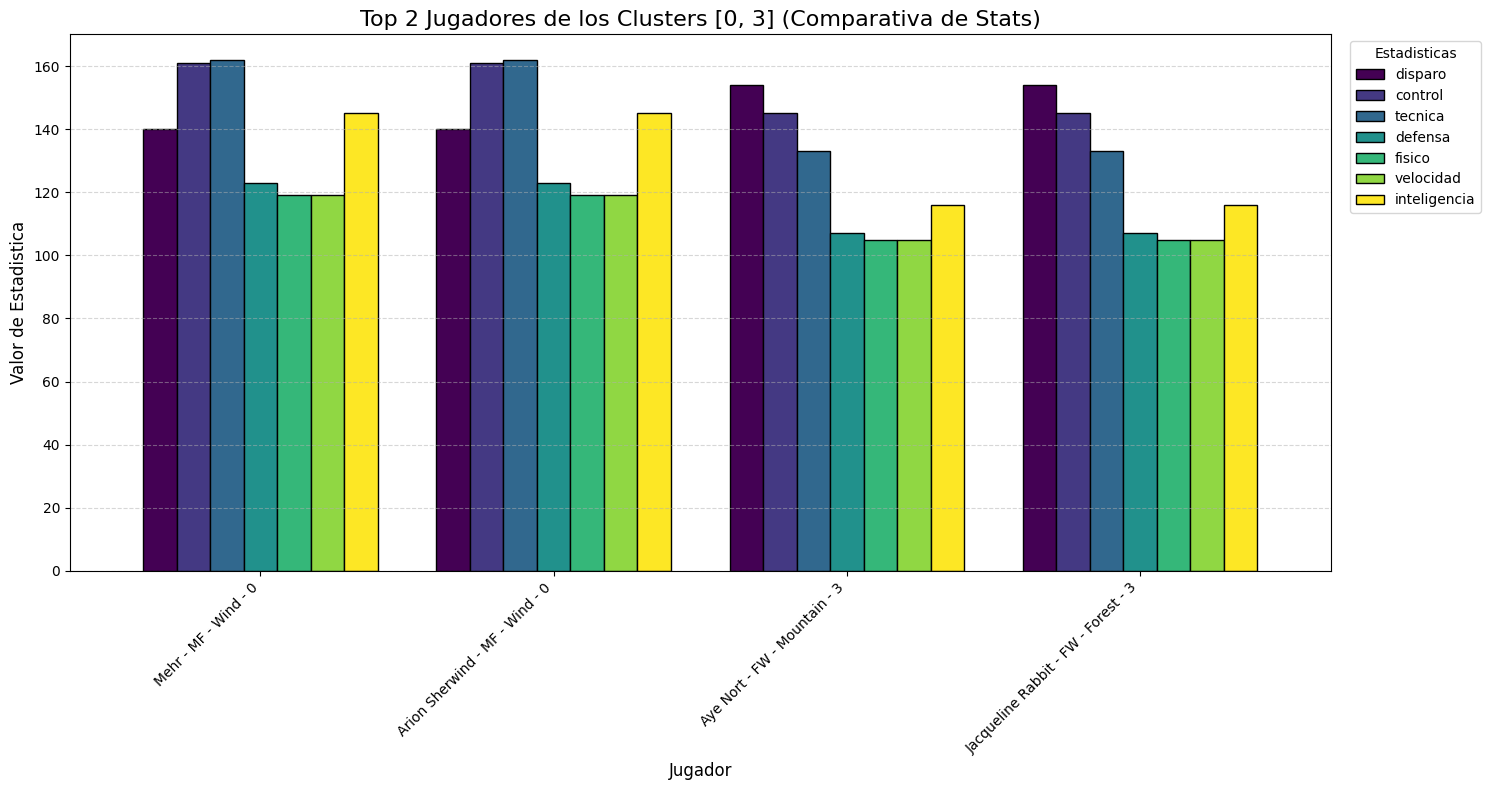

In [205]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_ward_final['04_clusters'], [0, 3])

En efecto, los del clúster 3 tienen `mejor disparo (nos confirma que su posición principal es esa),` mientras que los del 0 `sacrifican esto a favor de la técnica, control y, en especial, inteligencia (por algo, son más medios, aunque más ofensivos).`

##### **Con 8 clústers**
Podemos sacar lo siguiente:
- Hay un clúster (el 0) que `sigue siendo capaz de diferenciar una posición (porteros).`
- Hay un grupo de defensas `que es pequeño en comparación a los demás (clúster 6 VS clúster 4 y 7).`
- Parecido con los mediocampos, solo que con `los clústers 2 y 5 VS el 1.`
- Podemos analizar muchas más cosas (es explorar cada uno por su cuenta), pero me voy a fijar en `el clúster 1 y 2,` porque uno de ellos (el 1) **dividen en un grupo pequeño a los delanteros y medios,** mientras que el otro (el 2), lo hace **en grupos más grandes.** Da curiosidad saber qué ha diferenciado.

Dicho esto, vamos a ver los clústers `1 y 2, obteniendo sus mejores jugadores:`

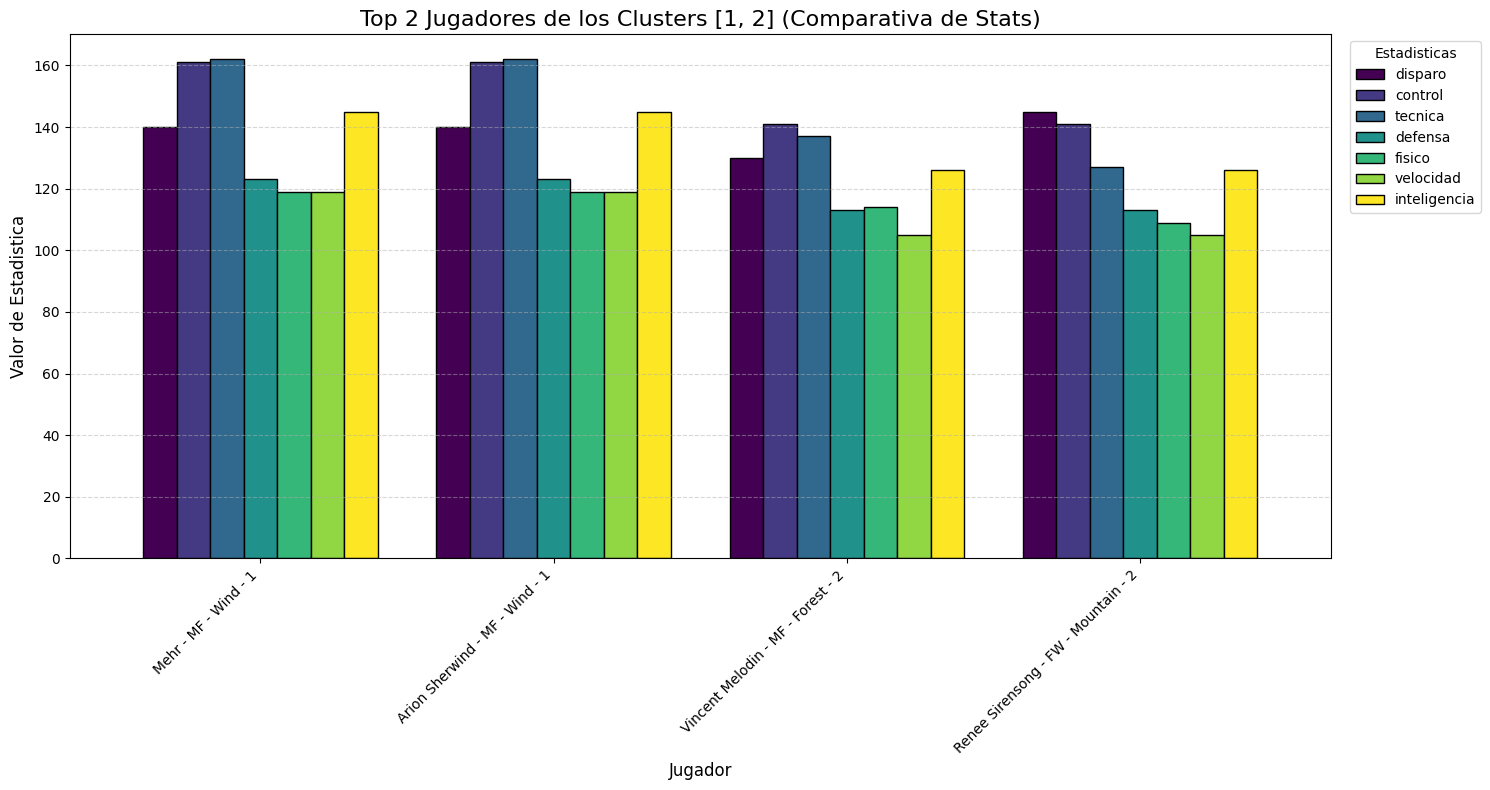

In [206]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_ward_final['08_clusters'], [1, 2])

Esto ya es más interesante:
- En primer lugar, `los mejores no tienen de posición principal el ser delanteros.` Es más, los del clúster 2 **tienen poca puntuación de delantero.**
- Lo segundo, se puede ver claramente que los del **clúster 2 `no tienen buenas stats,` siendo superados por los `2 mejores del clúster 1 en general.`**
- Podemos concluir que los del clúster 1, al menos, los jugadores **Arion Sherwind** y **Mehr** son jugadores `que destacan sobre los demás,` cumpliendo y teniendo stats de oro **para un centrocampista.**

Es posible sacar también los mejores de cada clúster, pero que sean `defensas (se podría filtrar si el clústering logró detectar algún defensa),` pero eso es algo que podeis investigar por vuestra cuenta. De momento, es importante lo de los jugadores mediocentros que encontramos.

##### **Con 30 clústers**
Podemos sacar lo siguiente:
- Hemos descubierto `las 30 plantillas de los jugadores que pusieron los creadores.`
- Cada posición principal esta contenida `en distintos clústers,` pero unos con menos jugadores que otros.
- De aquí podemos analizar muchas cosas (más que con 8 clústers), pero nos fijaremos en especial `en el clúster 4, 10 y 12,` ya que tienen **pocos jugadores, pero con stats bastante 'elevadas'.**

Para ello, vamos a obtener los `mejores jugadore de cada clúster,` así veremos que ha **agrupado cada uno (con la curiosidad que todos `son mediocentros como posición principal`):**

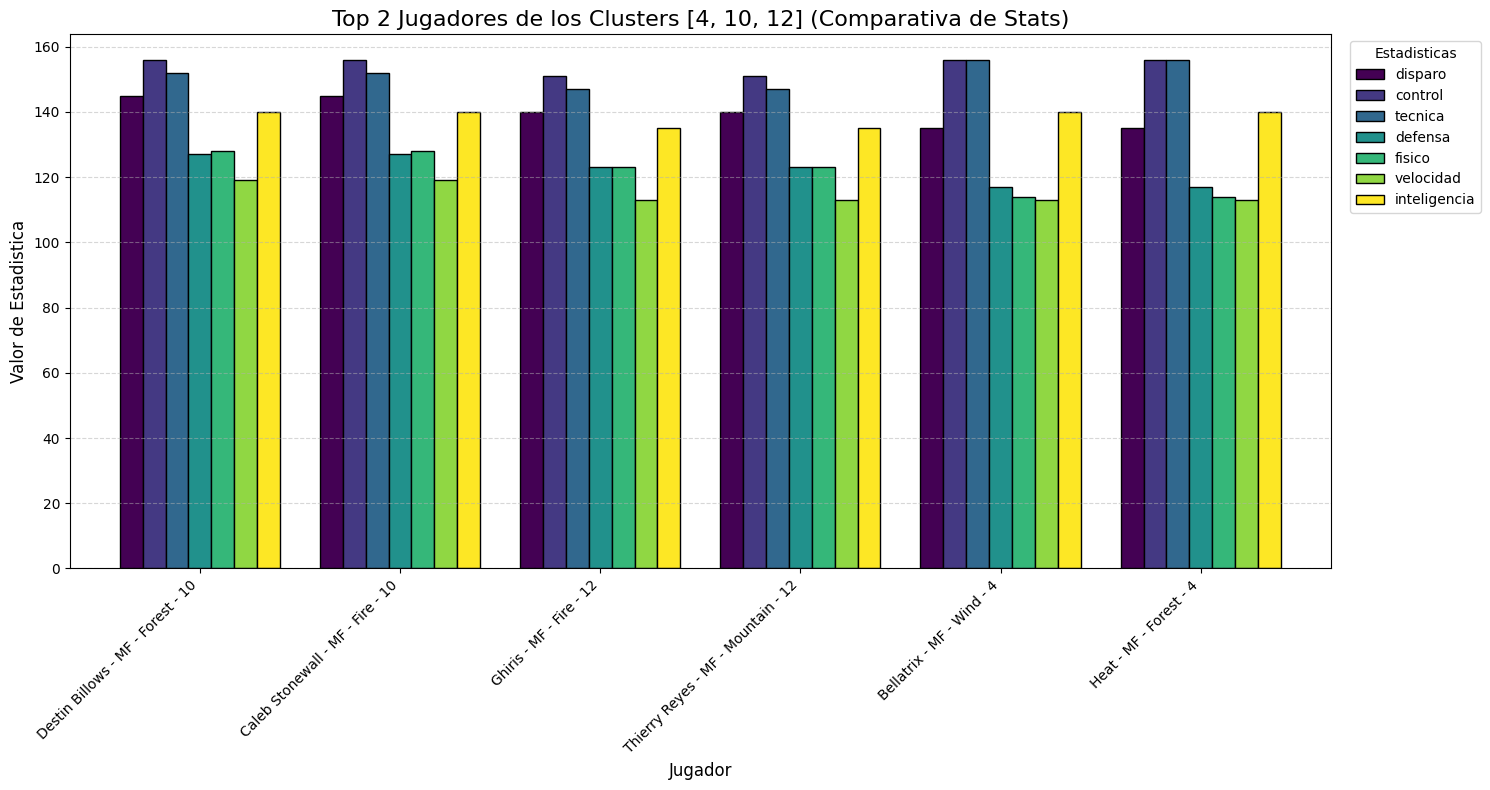

In [207]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_ward_final['30_clusters'], [4, 10, 12])

Esto ya es algo más interesante:
- Los del clúster 10, son `mejores en casi todas las stats (menos en técnica)` que los demás, demostrando que son mediocentros **mucho más completos, aunque no muy defensivos (son el Luka Modric ideal).**
- Siguiendo con esto, los del 4 `solo mejoran al 10 en la técnica e igualando en inteligencia,` empeorando notablemente **en las demás stats.** Podemos decir que `son algo peores que los del clúster 10, donde si tenemos para elegir entre el clúster 4 y 10, irnos por el 10 es lo mejor.`
- Y para rematar al clúster 4, los del `clúster 12` son un grupo de mediocentros que **mejoran al 4 (menos en inteligencia),** pero sin llegar a **superar al 10.**
- Esto confirma que, si quieres `un centrocampista a lo Luka Modric,` busca a los del **clúster 10 sin pensarlo (como a Caleb Stonewall).** Si no te gusta ninguno, tu segunda opción es `ir a por los del clúster 12,` ya que son algo peores, pero no por mucho. Como última opción, `los del clúster 4 pueden funcionar,` aunque la diferencia entre uno del 10 y otro del 4 es notoria.

Con esto, podemos analizar mucho más cada grupo, pero eso ya puede ir por vuestra cuenta.

#### **Análisis de resultados: Coseno**
Haremos lo mismo, pero con coseno:

In [208]:
# Mostramos los resultados ahora con coseno
analizar_resultados_clustering(df_analisis, df_coseno_final, columna_analisis='posicion_en')

=============== Stats con 04_clusters ===============


04_clusters,0,1,2,3
disparo,139.3,108.9,143.2,110.7
control,143.5,114.1,151.2,120.7
tecnica,136.7,113.5,145.9,113.5
defensa,109.9,130.0,118.1,125.3
fisico,108.3,135.5,117.0,133.6
velocidad,105.2,113.6,111.8,139.8
inteligencia,124.1,149.1,131.9,120.7


=============== Resultados de posicion_en con 04_clusters ===============


04_clusters,0,1,2,3
posicion_en,,,,
DF,0,1377,0,0
FW,1128,0,65,0
GK,0,0,0,764
MF,1191,0,168,0


=============== Stats con 09_clusters ===============


09_clusters,0,1,2,3,4,5,6,7,8
disparo,133.4,108.9,157.0,164.8,139.4,130.0,150.6,110.7,126.0
control,146.9,114.1,149.8,157.8,153.7,141.0,143.5,120.7,145.0
tecnica,145.2,113.5,136.2,143.8,151.1,137.0,130.7,113.5,147.0
defensa,115.7,130.0,113.8,120.3,122.0,113.0,109.3,125.3,107.0
fisico,115.8,135.5,110.0,116.8,121.1,114.0,106.5,133.6,105.0
velocidad,109.0,113.6,109.0,115.8,114.3,105.0,105.0,139.8,105.0
inteligencia,131.6,149.1,122.0,128.9,137.7,126.0,119.8,120.7,130.0


=============== Resultados de posicion_en con 09_clusters ===============


09_clusters,0,1,2,3,4,5,6,7,8
posicion_en,,,,,,,,,
DF,0,1377,0,0,0,0,0,0,0
FW,0,0,110,65,0,0,1018,0,0
GK,0,0,0,0,0,0,0,764,0
MF,126,0,0,0,42,616,0,0,575


=============== Stats con 30_clusters ===============


30_clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
disparo,110.0,116.0,135.0,154.0,116.0,110.0,135.0,120.0,126.0,159.0,130.0,130.0,154.0,120.0,163.0,145.0,159.0,145.0,140.0,140.0,110.0,149.0,126.0,106.0,169.0,116.0,126.0,116.0,110.0,120.0
control,116.0,126.0,156.0,151.0,120.0,120.0,145.0,131.0,145.0,151.0,151.0,141.0,145.0,126.0,156.0,141.0,156.0,156.0,151.0,161.0,116.0,145.0,131.0,110.0,161.0,120.0,135.0,126.0,120.0,131.0
tecnica,117.0,117.0,156.0,137.0,123.0,113.0,142.0,123.0,147.0,137.0,152.0,137.0,133.0,127.0,142.0,127.0,142.0,152.0,147.0,162.0,113.0,133.0,133.0,107.0,147.0,117.0,127.0,117.0,113.0,123.0
defensa,127.0,127.0,117.0,123.0,133.0,127.0,117.0,137.0,107.0,113.0,113.0,113.0,107.0,137.0,117.0,113.0,127.0,127.0,123.0,123.0,137.0,117.0,142.0,133.0,123.0,142.0,137.0,133.0,123.0,133.0
fisico,133.0,138.0,114.0,119.0,138.0,133.0,119.0,142.0,105.0,109.0,109.0,114.0,105.0,142.0,114.0,109.0,123.0,128.0,123.0,119.0,142.0,114.0,147.0,138.0,119.0,147.0,147.0,138.0,133.0,142.0
velocidad,113.0,145.0,113.0,113.0,119.0,137.0,109.0,145.0,105.0,109.0,109.0,105.0,105.0,123.0,113.0,105.0,119.0,119.0,113.0,119.0,119.0,109.0,127.0,113.0,119.0,123.0,155.0,141.0,141.0,149.0
inteligencia,145.0,126.0,140.0,135.0,149.0,120.0,130.0,130.0,130.0,120.0,135.0,126.0,116.0,154.0,126.0,126.0,140.0,140.0,135.0,145.0,159.0,130.0,159.0,154.0,130.0,163.0,135.0,126.0,120.0,130.0


=============== Resultados de posicion_en con 30_clusters ===============


30_clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
posicion_en,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DF,739,0,0,0,60,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,35,0,3,520,0,5,0,0,0,0
FW,0,0,0,4,0,0,0,0,0,88,0,0,636,0,31,382,3,0,0,0,0,22,0,0,27,0,0,0,0,0
GK,0,40,0,0,0,305,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,13,388,10
MF,0,0,12,0,0,0,86,0,575,0,40,616,0,0,0,0,0,7,21,2,0,0,0,0,0,0,0,0,0,0


Vamos a explicar los resultados obtenidos a más detalle.

##### **Con 4 clústers**
Podemos destacar lo siguiente:
- Las posiciones de `defensa y portero` logran estar cada uno **en un clúster.**
- Sin embargo, a diferencia de ward, con la posición de `mediocentro y delantero,` están **distribuidas en `2 clústers:` La mayoría en el clúster 0, mientras que solo unos cuantos en el clúster 2.**
- Esto nos puede indicar que `hemos encontrado jugadores especiales,` que pueden ser o en lo bueno o en lo malo.

Con esto, vamos a ver los mejores jugadores de cada clúster:

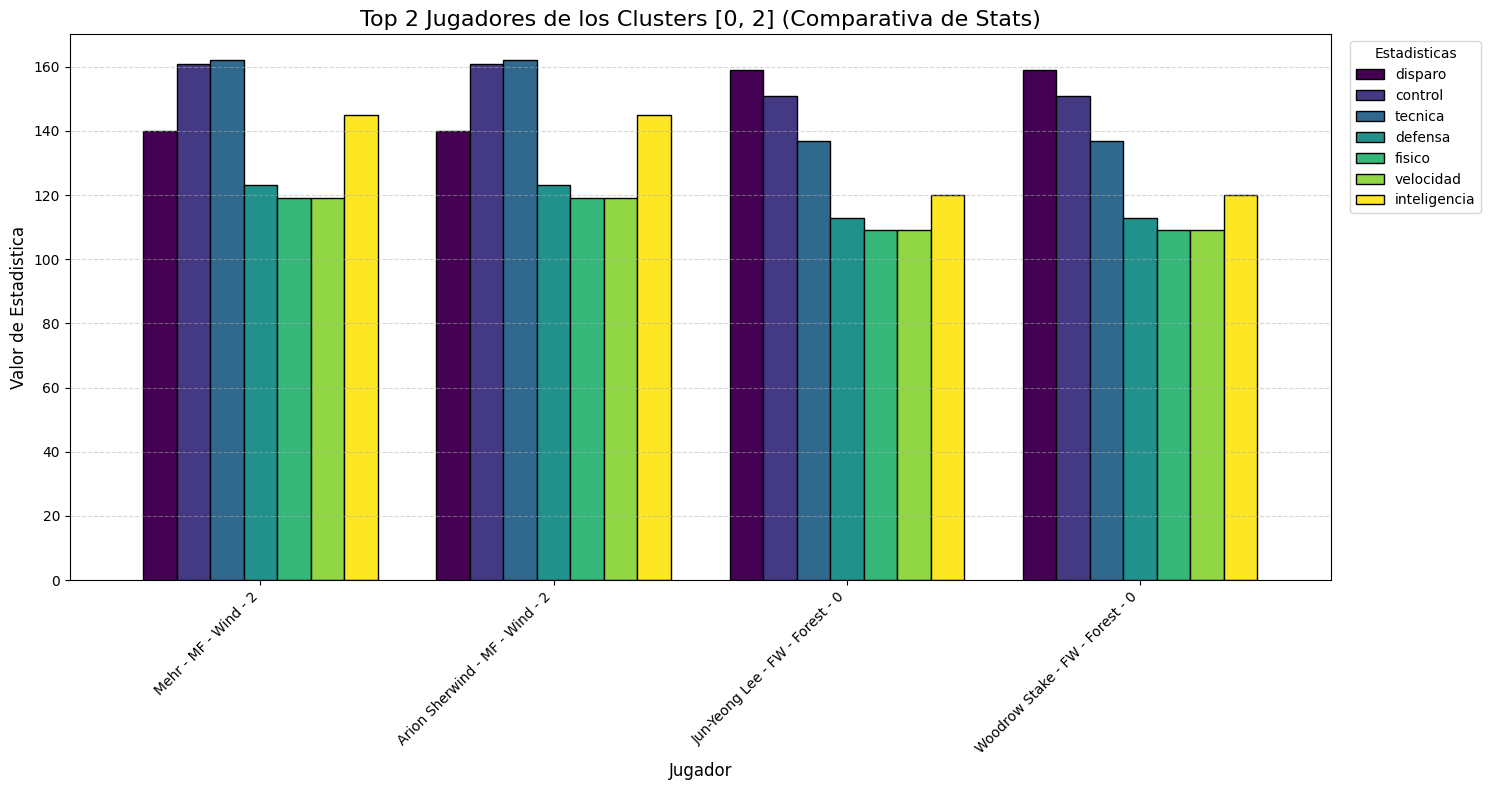

In [209]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_coseno_final['04_clusters'], [0, 2])

Esto confirma:
- Los mejores jugadores `del clúster 2` son **mediocampistas loc cuales `son muy creativos, con un control y técnica exquisitos (posiblemente los mejores del juego).`** aunque con defensa, físico y velocidad `algo bajos (serían el Toni Kross en la vida real).`
- En el `clúster 0,` sin embargo, tenemos colados a **delanteros con posiblemente el mejor tiro del juego,** pero escasean en `control, y más notoriamente en todo lo demas.` Tenemos algunos jugadores que pueden ser delanteros `puros, pero que al escasear en el físico, pueden tener carencias por ejemplo en los duelos aéreos (remate de cabeza).` Son delanteros que son algo **engañosos,** aunque tampoco son malísimos.

En conclusión, hemos descubierto `muy buenos centrocampistas  (casualmente los mismos que con ward).` Podemos buscar si los delanteros del clúster 2 `son tan buenos como lo fueron los centrocampistas,` pero ya es algo que podeis buscar (como dije, con esto podemos buscar muchísimas cosas).

##### **Con 9 clústers**
Lo más curioso que podemos sacar:
- Tanto la posición del GK como la de DF `están agrupadas en un clúster cada una.` Esto indica que estánj **bien diferenciadas.**
- Lo curioso está con los `clústers 2 y 3, y también el 0 y 4,` ya que ambos son **clústers muy pequeños.** Sería bueno saber que agrupa cada uno.
- Vamos a ver en especial el de los `delanteros para variar un poco (da la casualidad que son los de mejor disparo).`

Dicho esto, es hora de ver los mejores jugadores de cada clúster:

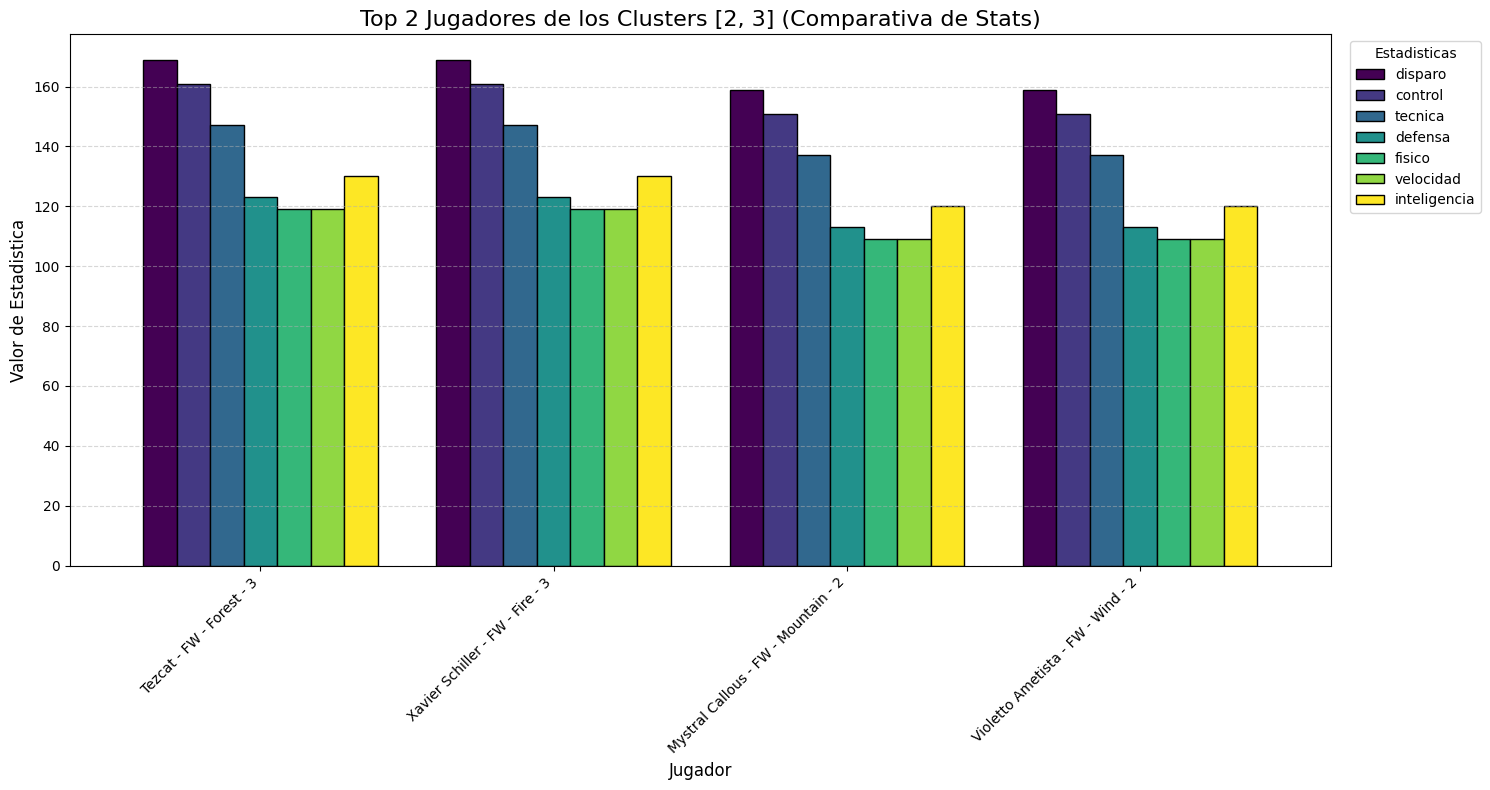

In [210]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_coseno_final['09_clusters'], [2, 3])

Esto es más interesante:
- Podemos concluir que los del `clúster 3` son los **delanteros con `mejores stats.`** Son delanteros muy buenos, `incluso superando a los encontrados con 4 clústers (en el análisis anterior, los del clúster 0).` Son delanteros que hay que coger si o si para el competitivo.
- Sin embargo, los del `clúster 2` son delanteros **identicos que los identificados en el anterior análisis.** No hemos descubierto nada nuevo, solo los confirmamos como `delanteros como una alternativa secundaria no tan mala.`

En conclusión, hemos logra separar `delanteros que son algo mejores que la media` y delanteros `que son lo más top.` Información muy útil a la hora de un competitivo. Lo interesante es que lo descubrimos **gracias a usar la distancia coseno, con ward no lo hemos visto bien.**

##### **Con 30 clústers**
Similar a ward:
- Confirmamos de nuevo las `30 plantillas` que definió el equipo de Level-5.
- Es más, al analizar detalladamente, tenemos `los mismos clústers que con ward.` Esto ya dice que si existen 30 plantillas.+

Como ya sabemos que es el **mismo resultado que el `ward,`** no hace falta analizar más, ya que lo hemos hecho (un poco) con ward. Solo vamos a comprobar mediante código si los resultados `son iguales:`

In [211]:
# Libreria a usar
from sklearn.metrics import adjusted_rand_score

In [212]:
# Funcion que comprueba si 2 resultados de clustering son iguales
def comparar_resultados_clustering(df_base: pd.Series, df_comparar: pd.Series):

    # Calculamos el 'adjusted rand score'
    score = adjusted_rand_score(df_base, df_comparar)
    print(f'El resultado del score es {score}')

    # Variable que dice si son iguales o no (si es 1)
    es_igual = False if score != 1.0 else True

    # Mostramos los resultados
    print(f'¿Resultados del clústering iguales? {es_igual}')

In [213]:
# Comparamos el resultado de ward y coseno
comparar_resultados_clustering(df_ward_final['30_clusters'], df_coseno_final['30_clusters'])

El resultado del score es 1.0
¿Resultados del clústering iguales? True


Esto confirma que `los resultados SI son iguales.` El ARI-score indica hasta qué punto `dos particiones de clústers contienen las mismas asignaciones de elementos,` independientemente de los nombres o etiquetas de los clústers.

Dos resultados pueden tener etiquetas distintas, pero si agrupan a los mismos datos de la misma manera, el ARI **será 1 (lo que hemos obtenido).**

### **Clústering particional**
Este algoritmo consiste en `definir n centroides,` y mediante un número de iteraciones (o hasta que no cambien el número de puntos de los clústers) ir **agrupando puntos, recalcular centroides y repetir el proceso.**

Este es algo más 'sencillo', partiendo que ya tenemos la base y resultados del `clústering jerárquico.`

#### **¿Cómo elegir el número de clúster?**
Para hacerlo, partimos de una premisa similar a la del particional: Probaremos `el rango entre [4, 30],` con la diferencia que veremos que `tan buenos pueden ser los clústers,` al intentar buscar el **número 'adecuado' de clústers.** Para ello, hay una manera de elegir `este número adecuado de clústers:` El método del 'codo'.

Este `método del codo` consiste en calcular `la inercia (la suma de las diferencias al cuadrado entre cada punto y el centroide de su clúster),` y ver si, aumentando más clústers, la inercia **hace un cambio significativo o no, y si después ya no cambia mucho.** Cuando lo haga, hemos encontrado el número ideal de clústers (clústers con poca inercia, o sea, **más compactos/agrupados**).

Vamos a graficar este gráfico, y veremos cuál es el número ideal de clústers:

In [214]:
# Libreria a usar
from sklearn.cluster import KMeans

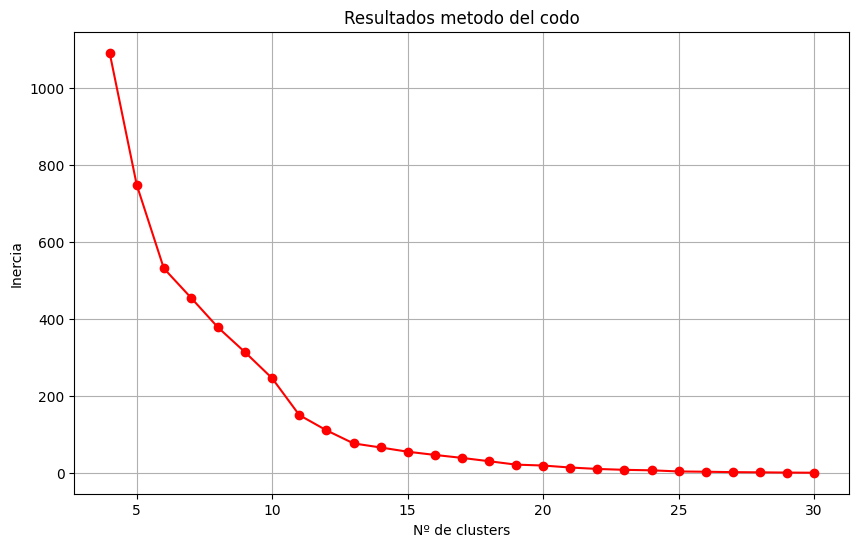

In [215]:
# Definimos el numero de clusters a probar
cluster_kmeans = np.arange(4, 31)

# Definimos una lista que almacenara la inercia
inercia = list()

# Bucle para probar
for cluster in cluster_kmeans:

    # Ejecutamos kmeans
    resultado_kmeans = KMeans(n_clusters=cluster, random_state=42).fit(df_clustering)

    # Almacenamos la inercia
    inercia.append(resultado_kmeans.inertia_)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(cluster_kmeans, inercia, color='red', marker='o')
plt.title('Resultados metodo del codo')
plt.xlabel('Nº de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

A primera vista:
- Vemos que con `30 clústers` tenemos **0 de inercia.** Esto confirma, en efecto, las `30 plantillas predefinidas.`
- Con 4, vemos `bastante inercia,` lo cual podría indicar clústers **poco compactos.**
- Aún asi, podemos ver que puede existir clústers que `sean similares (como con el jerárquico).`
- Si vemos con `11 clústers,` a partir de ahí, la inercia **baja muy poco.** Puede indicar el posible 'número ideal' de clústers.

Con esto, pues vamos a obtener los resultados con 4 (posiciones posibles), 11 (número ideal según el 'codo') y 30 clústers (las plantillas predefinidas):

In [216]:
# Cluster a generar
clusters_ideales = [4, 11, 30]

# Resultados del clustering KMeans
resultados_kmeans = dict()

# Bucle para ejecutar el algoritmo con los clústers
for cluster in clusters_ideales:

    # Ejecutamos y obtenemos el resultado
    resultado_kmeans = KMeans(n_clusters=cluster, random_state=42).fit_predict(df_clustering)

    # Lo guardamos
    resultados_kmeans[f'{cluster:02d}_clusters'] = resultado_kmeans

# Lo pasamos a df
df_resultado_kmeans =  pd.DataFrame(resultados_kmeans)
df_resultado_kmeans

,04_clusters,11_clusters,30_clusters
0,2,9,29
1,0,9,14
2,0,9,14
3,0,9,14
4,0,9,14
...,...,...,...
4688,2,10,9
4689,0,6,10
4690,0,6,10
4691,0,4,20


#### **Evaluando los resultados del clústering**
Ahora, solo nos queda ver `que scores les da tanto Silueta y Davies (usaremos de nuevo ambas):`

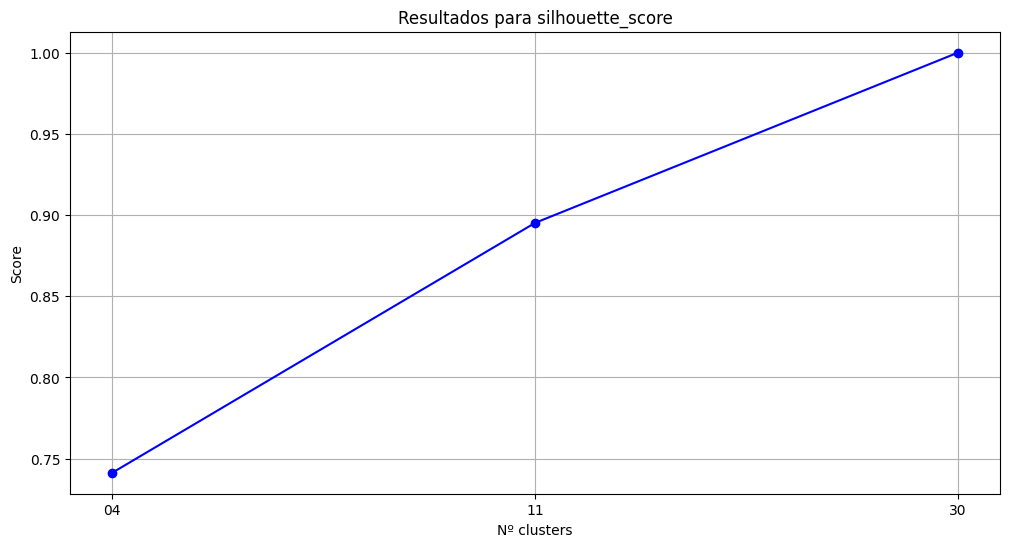

Score mas alto para silhouette_score: 30_clusters - 1.00
Score mas bajo para silhouette_score: 04_clusters - 0.74


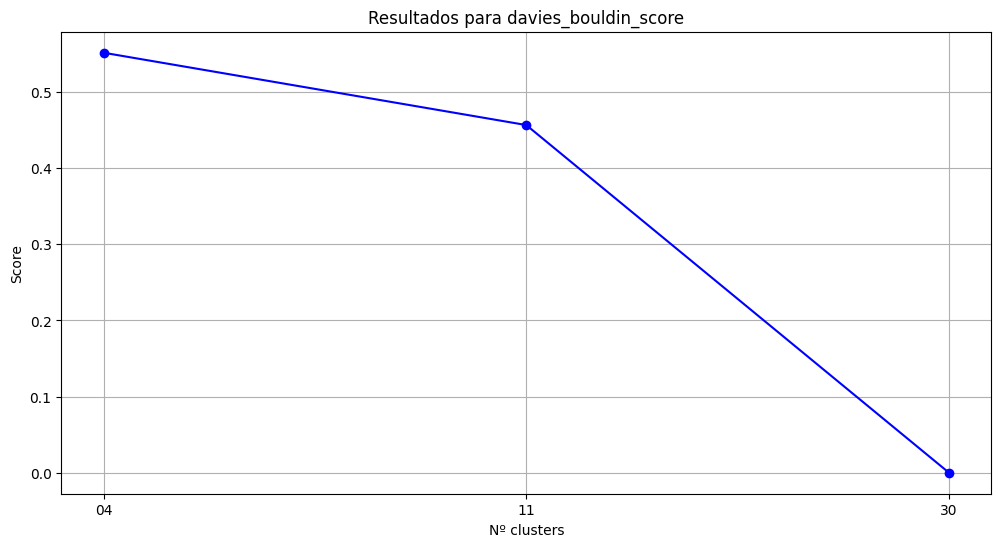

Score mas alto para davies_bouldin_score: 04_clusters - 0.55
Score mas bajo para davies_bouldin_score: 30_clusters - 0.00


In [217]:
# DF con el resultado agregado
df_kmeans = pd.concat([df_clustering.copy(), df_resultado_kmeans], axis=1)

# Graficamos el resultado del score de silueta
calcular_scores_graficar(df_kmeans, df_resultado_kmeans.columns, silhouette_score)

# Y el de Davies
calcular_scores_graficar(df_kmeans, df_resultado_kmeans.columns, davies_bouldin_score)

Esto solo vuelve a confirmar lo que suponíamos:
- Las `30 plantillas predefinidas` son encontradas por el algoritmo, confirmando de nuevo **la existencia de estas.**
- Con `4 clústers` se encuentra una **estructura en los clústers** según silueta, pero Davies dice que **los clústers no son `tan compactos ni tan separados` como deberían.** Puede ser un agrupamiento bueno y ya.
- Con 11, vemos que tenemos `un silueta de casi 0.9,` lo cual indica **clústers bien definidos en general.** Con Davies, es verdad que los clústers están **mejor separados y compactos,** pero que todavía `no logran ser ideales.` Esto refuerza la idea de las 30 plantillas.

Con estos resultados, vamos a analizar de nuevo lo que hemos encontrado con los distintos grupos de clústering.

#### **Análisis de resultados: KMeans**
Al tener solo que probar los 3 clústers, el análisis es más corto:

In [218]:
###### Mostramos los resultados con kmeans
analizar_resultados_clustering(df_analisis, df_resultado_kmeans)

=============== Stats con 04_clusters ===============


04_clusters,0,1,2,3
disparo,139.7,110.7,118.0,108.3
control,144.1,120.7,123.3,113.5
tecnica,137.5,113.5,123.4,112.9
defensa,110.6,125.3,134.5,129.5
fisico,109.0,133.6,138.9,135.1
velocidad,105.7,139.8,119.8,113.0
inteligencia,124.7,120.7,152.3,148.7


=============== Resultados de posicion_en con 04_clusters ===============


04_clusters,0,1,2,3
posicion_en,,,,
DF,0,0,118,1259
FW,1190,0,3,0
GK,0,764,0,0
MF,1350,0,9,0


=============== Stats con 11_clusters ===============


11_clusters,0,1,2,3,4,5,6,7,8,9,10
disparo,126.0,110.0,110.0,154.6,136.2,106.0,145.0,130.0,111.2,162.2,115.0
control,145.0,120.0,116.0,145.7,147.8,110.0,141.0,141.0,121.2,157.7,119.9
tecnica,147.0,113.0,117.0,133.5,144.6,107.0,127.0,137.0,113.9,145.0,120.5
defensa,107.0,127.0,127.0,107.7,116.8,133.0,113.0,113.0,124.1,121.0,135.3
fisico,105.0,133.0,133.0,105.5,116.3,138.0,109.0,114.0,134.0,117.9,140.3
velocidad,105.0,137.0,113.0,105.5,109.7,113.0,105.0,105.0,141.7,116.2,119.9
inteligencia,130.0,120.0,145.0,116.5,132.3,154.0,126.0,126.0,121.1,130.4,153.4


=============== Resultados de posicion_en con 11_clusters ===============


11_clusters,0,1,2,3,4,5,6,7,8,9,10
posicion_en,,,,,,,,,,,
DF,0,0,739,0,0,520,0,0,0,0,118
FW,0,0,0,724,22,0,382,0,0,65,0
GK,0,305,0,0,0,0,0,0,459,0,0
MF,575,0,0,0,159,0,0,616,0,9,0


=============== Stats con 30_clusters ===============


30_clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
disparo,126.0,110.0,110.0,159.0,154.0,130.0,106.0,145.0,110.0,116.0,145.0,135.0,120.0,135.0,169.0,116.0,163.0,110.0,120.0,140.0,130.0,149.0,126.0,116.0,116.0,154.0,126.0,120.0,159.0,140.0
control,145.0,120.0,116.0,151.0,145.0,141.0,110.0,156.0,120.0,120.0,141.0,156.0,131.0,145.0,161.0,126.0,156.0,116.0,126.0,151.0,151.0,145.0,135.0,120.0,126.0,151.0,131.0,131.0,156.0,161.0
tecnica,147.0,113.0,117.0,137.0,133.0,137.0,107.0,152.0,113.0,123.0,127.0,156.0,123.0,142.0,147.0,117.0,142.0,113.0,127.0,147.0,152.0,133.0,127.0,117.0,117.0,137.0,133.0,123.0,142.0,162.0
defensa,107.0,127.0,127.0,113.0,107.0,113.0,133.0,127.0,123.0,133.0,113.0,117.0,133.0,117.0,123.0,127.0,117.0,137.0,137.0,123.0,113.0,117.0,137.0,142.0,133.0,123.0,142.0,137.0,127.0,123.0
fisico,105.0,133.0,133.0,109.0,105.0,114.0,138.0,128.0,133.0,138.0,109.0,114.0,142.0,119.0,119.0,138.0,114.0,142.0,142.0,123.0,109.0,114.0,147.0,147.0,138.0,119.0,147.0,142.0,123.0,119.0
velocidad,105.0,137.0,113.0,109.0,105.0,105.0,113.0,119.0,141.0,119.0,105.0,113.0,149.0,109.0,119.0,145.0,113.0,119.0,123.0,113.0,109.0,109.0,155.0,123.0,141.0,113.0,127.0,145.0,119.0,119.0
inteligencia,130.0,120.0,145.0,120.0,116.0,126.0,154.0,140.0,120.0,149.0,126.0,140.0,130.0,130.0,130.0,126.0,126.0,159.0,154.0,135.0,135.0,130.0,135.0,163.0,126.0,135.0,159.0,130.0,140.0,145.0


=============== Resultados de posicion_en con 30_clusters ===============


30_clusters,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
posicion_en,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DF,0,0,739,0,0,0,520,0,0,60,0,0,0,0,0,0,0,35,15,0,0,0,0,5,0,0,3,0,0,0
FW,0,0,0,88,636,0,0,0,0,0,382,0,0,0,27,0,31,0,0,0,0,22,0,0,0,4,0,0,3,0
GK,0,305,0,0,0,0,0,0,388,0,0,0,10,0,0,40,0,0,0,0,0,0,5,0,13,0,0,3,0,0
MF,575,0,0,0,0,616,0,7,0,0,0,12,0,86,0,0,0,0,0,21,40,0,0,0,0,0,0,0,0,2


##### **Con 4 clústers**
Si que es interesante lo que vemos:
- A diferencia del `clústering jerárquico,` quitando las agrupaciones, los grupos formados se caracterizan **por tener muy buenas stats en ciertas cosas,** y otros en tenerlo **regular.**
- Si miramos el `clúster 0 y 2,` vemos stats **muy potenciadas y otras muy bajas.** Esto puede indicar jugadores chetados para `ciertas posiciones.`
- Si nos vamos con el `clúster 1,` estamos posiblemente ante un **grupo de jugadores que no son tan 'buenos', solo veloces.**

Si vemos ahora cada posición en cada clúster:
- Es bastante similar a los `resultados del jerárquico,` con la diferencia que el **clúster 2** tiene `3 tipos de jugadores distintos (posiciones).`
- Esto puede indicar que `pueden existir jugadores que no son del todo su posición.`
- También es interesante `saber las diferencias con el clúster 3 (en teoría, de los defensas).`

Para ello, veamos los mejores jugadores de cada clúster:

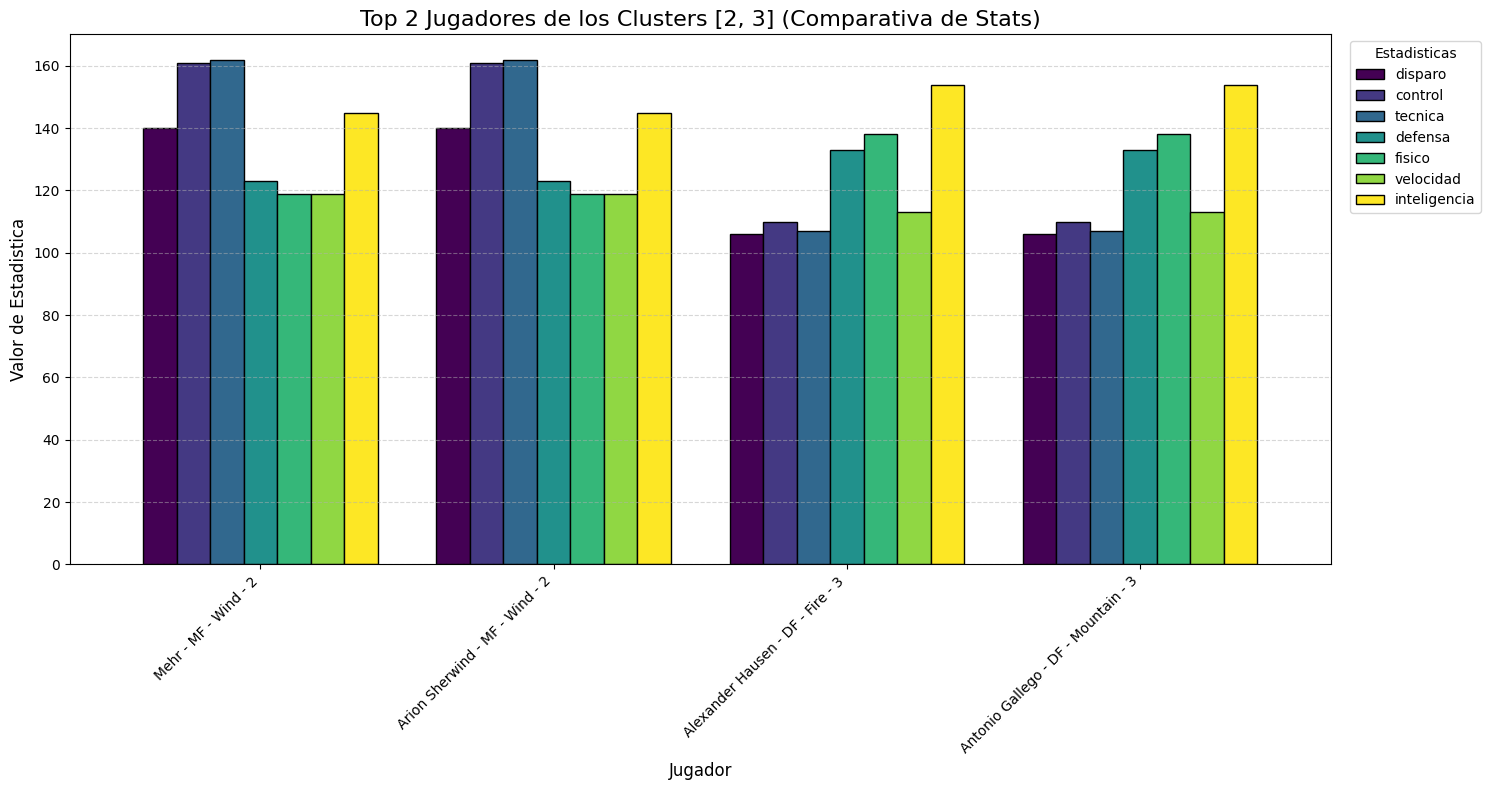

In [219]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_resultado_kmeans['04_clusters'], [2, 3])

Aqui vemos ya cosas muy interesantes:
- El `clúster 2` contiene a **2 de los mejores medios,** lo cual `no responde` a las estadísticas del clúster.
- Sin embargo, el `clúster 3` tiene a **defensas que son regulares,** es decir, como los 'estándar'.
- Lo bueno de esto es que, el `clúster 2` ha detectado que **hay medios que `pueden 'rivalizar' con los defensas` del clúster 3.** No hay gran diferencia (o al menos, no abismal) que los diferencie, aunque en un competitivi **si se podría notar.** Pero tener a un jugador versátil siempre es bueno.

En conclusión, se encontró `jugadores top de una posición` y que rinden **tan bien como jugadores 'normales' de otra posición.** Esto puede ser clave a la hora de formar un equipo por si necesitas un 'plan de emergencia'.

##### **Con 11 clústers**
Vemos algunos saltos de calidad:
- Similar a los resultados del `clústering jerárquico con más clústers (creo que no lo mencioné,` tenemos ahora sí **clúster que contienen a un solo tipo de jugador (menos con el clúster 4 y 9).**
- Y ahora sí, encontramos `un clúster (el 9),` que puede almacenar a **los delanteros más top.**
- También es curioso los `clústers 5 y 10,` ya que pueden contener **a defensas bastante potentes.** Solo queda ver la diferencia entre ambos.

Dicho esto, vamos a ver `los clústers 5 y 10,` por los **defensas y la similitud entre estos clústers,* y también el `clúster 9 para ver a los delanteros TOP:`

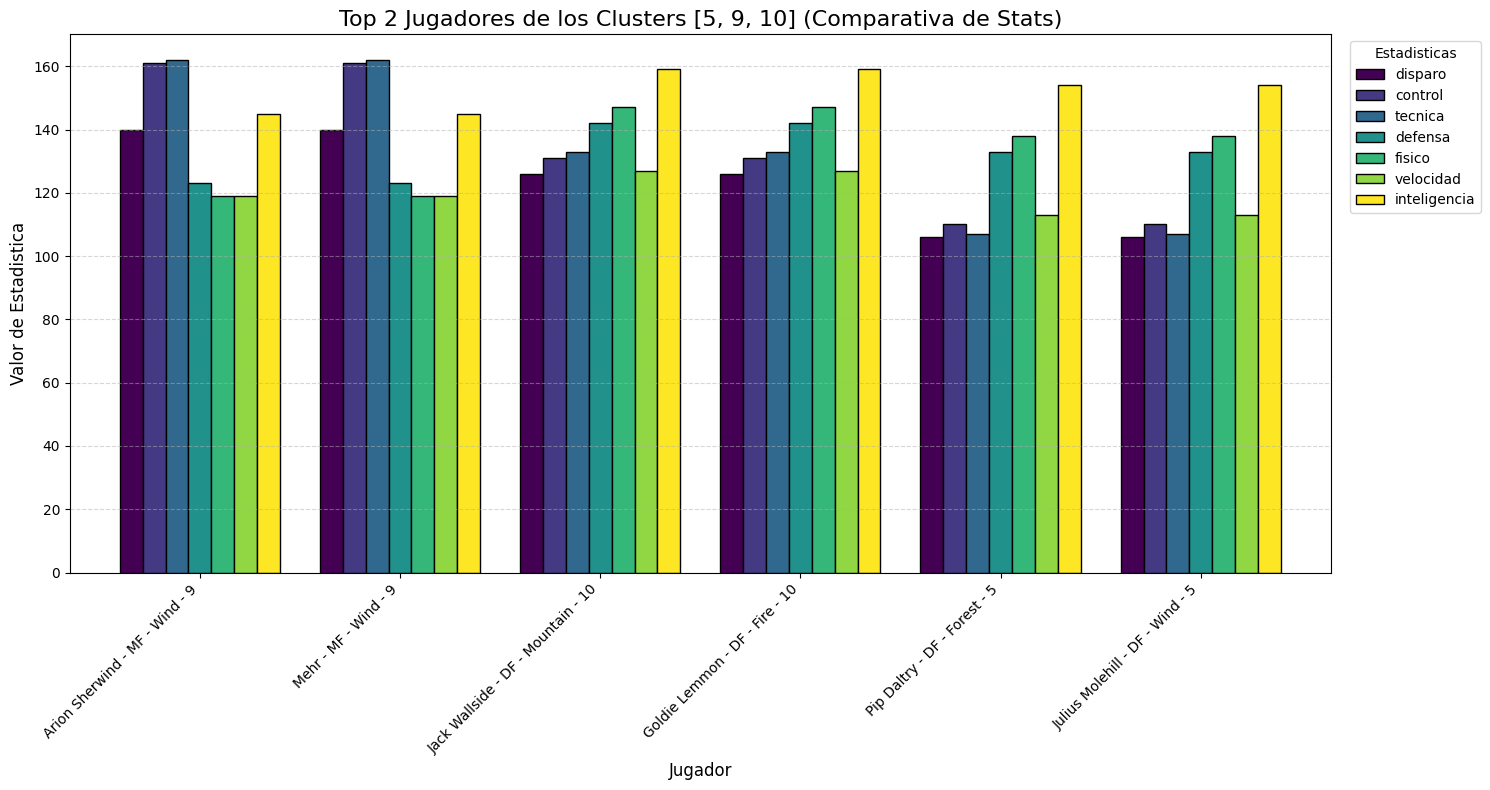

In [220]:
# Sacamos los mejpres jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_resultado_kmeans['11_clusters'], [5, 9, 10])

Esto es más interesante:
- Ahora, vemos que `Mehr y Arion (los que con 4 clústers eran posibles defensas normales),` en verdad ahora están en el **clúster de delanteros buenos.** Vemos aquí que `contradecimos al resultado del experimento anterior.`
- Podemos ver que este resultado `es mejor` al ver los **clúster 5 y 10.**
- El `clúster 5` contiene al parecer a **defensas los cuales no son lo máximo, pero son mejores que los estándar.**
- Mientras que el `clúster 10` si que muestra a **defensas los cuales `parecen estar cerca de ser TOPs, pero sin serlo.`**
- Tanto con el resultado del `clúster 5 y 10,` podemos decir que confirmamos que **Mehr y Arion** tiran mejor a `delanteros buenos más que a defensas aceptables.`

Los resultados de este clústering fueron mucho mejores e interesantes. Estaría bien `explorar más a profundidad los resultados,` a ver si se encuentran cosas más curiosas.

##### **Con 30 clústers**
Con esto podemos concluir algunas cosas:
- Confirmamos las `30 plantillas predefinidas,` ya que tenemos **30 clústers, con `solo un tipo de jugador en cada uno.` Curiosamente, a primera vista, muy similar que a los resultados del jerárquico (ambos).
- Solo queda comprobar si `los resultados son iguales.` Caso contrario, encontraríamos **un contraejemplo** que indica que `en verdad no hay 30 plantillas.`

Dicho esto, vamos a ver si los resultados de `ward (o coseno, da igual ya que son los mismos resultados)` y `KMeans` dan los **mismos resultados:**

In [221]:
# Comparamos el resultado del jerarquico y KMeans
comparar_resultados_clustering(df_ward_final['30_clusters'], df_kmeans['30_clusters'])

El resultado del score es 1.0
¿Resultados del clústering iguales? True


Con esto, confirmamos una vez más las `30 plantillas encontradas y definidas por los desarrolladores.`

### **Clústering de densidad**
Ya que KMeans no funcionó como esperábamos, y al parecer el jerárquico es el que mejor rindió, vamos a probar un último algoritmo para ver otra perspectiva al agrupar: DBSCAN

Este algoritmo consiste en `capturar zonas donde exista mucha 'densidad' (es decir, muchos puntos).` Para ello, cada punto busca en un radio determinado **cuantos puntos tiene en su alcance.** Luego le definimos el tipo de punto que es, puede ser `un 'centroide' o un punto del clúster.` Lo mejor es que nos permite detectar puntos **sucios,** los cuales `no logran pertenecer a un clúster.`

Definido brevemente el algoritmo, debemos de buscar **2 hiperparámetros super importantes:** El `radio` donde cada punto puede ver a otros, y los `mínimos puntos` que debe de 'ver' cada punto para ser considerado un 'centroide' (core point). Para ello, hay diferentes técnicas para estimarlos.

#### **Encontrando el valor adecuado de 'mínimos puntos' (min_samples)**
Para ello, hay muchas estrategias, pero las más utilizadas y que casi siempre funcionan son las siguientes:
- Mediante el `logaritmo neperiano del total de registros.` Suele funcionar ya que, mientras más registros, más es el número, con la diferencia que este 'incremento' `se ve reducido` mientras existan más registros.
- Mediante el `doble de dimensiones (features` que tengamos. También suele funcionar ya que, al recomendarse usar DBSCAN **con no más de 5-6 dimensiones (sino no se obtendría los mejores resultados),** obtendríamos un conjunto óptimo de clústers, sin depender de tener poca o mucha información (la desventaja del primer método).
- Como los resultados del `clústering jerárquico` y parte del particional (cuando descubrimos las 30 plantillas) dicen que es posible que **existan plantillas solo para `2 jugadores,`** vamos a probarlo también. Es verdad que rompe la idea de `DBSCAN al no existir dicha 'densidad',` pero no perdemos nada **explorando los resultados de este experimento.**

Dicho esto, vamos a usar ambos y ver si tenemos los mismos resultados:

In [222]:
# Libreria a usar
import math

In [223]:
# Lista con los min_samples
min_samples = list()

# Aniadimos el 2 por los resultados pasados de los clusterings
min_samples.append(2)

# Calculamos el ln de los registros y lo aniadimos
min_samples.append(round(math.log(df_clustering.shape[0])))

# Calculamos el doble de dimensiones
min_samples.append(df_clustering.shape[1] * 2)

# Mostramos
min_samples

[2, 8, 10]

Tenemos dos posibles valores: el 10 y el 8. Son razonables ya que es `extraño encontrar plantillas (si las encontramos) con pocos jugadores.`

Definido esto, vamos con lo otro importante: la distancia para buscar a los puntos que estén **en su radio.**

#### **Encontrando el valor adecuado de 'radio' (eps)**
Para ello, hay muchas estrategias (como con min_samples), pero una destaca por encima de casi todas: el `K-distance plot.`

Este gráfico contiene `las distancias a los 'n' vecinos más cercanos de todos los puntos.` La idea es, encontrar la **distancia hacia los vecinos más lejanos donde esta sea gigantesca,** lo cuál indicaría `puntos muy alejados.` La distancia anterior sería la ideal para estimar eps.

Dicho esto, generemos el K-distance plot. Aclarar que, solemos usar `los min_samples` para definir el 'n':

In [224]:
# Libreria a utilizar
from sklearn.neighbors import NearestNeighbors

In [225]:
# Funcion para proyectar el K-distance plot
def dibujar_k_distance(df: pd.DataFrame, n_vecinos: list):

    # Lienzo para dibujar el k-distance
    fig, axes = plt.subplots(len(n_vecinos), 1, figsize=(10, len(n_vecinos) * 6))

    # Bucle para dibujar y calcular el k-distance
    for n, axe in zip(n_vecinos, axes):

        # Calculamos la distancia al vecino mas lejano
        distancia_vecinos = NearestNeighbors(n_neighbors=n, n_jobs=-1).fit(df)

        # Obtenemos los resultados
        distancias, indices = distancia_vecinos.kneighbors(df)

        # Ordenamos las distancias
        distancias_ordenadas = np.sort(distancias[:, n - 1], axis=0)

        # Calculamos la diferencia
        saltos = np.diff(distancias_ordenadas, n=1)

        # Obtenemos con esto, la distancia obtima
        distancia_obtima = np.argmax(saltos)

        # Mostramos
        print('=' * 10, f'Mejor distancia con {n:02d} vecinos', '=' * 10)
        print(f'La distancia ideal con {n:02d} vecinos es {distancias_ordenadas[distancia_obtima]: .5f}')
        print(f'La distancia cuando da el salto con {n:02d} vecinos es {distancias_ordenadas[distancia_obtima + 1]: .5f}')

        # Graficamos
        axe.plot(distancias_ordenadas, color='purple')
        axe.set_xlabel('Puntos')
        axe.set_ylabel('Distancias')
        axe.set_title(f'K-distance para {n:02d} samples')

    # Mostramos
    plt.tight_layout()
    plt.show()

========== Mejor distancia con 02 vecinos ==========
La distancia ideal con 02 vecinos es  0.00000
La distancia cuando da el salto con 02 vecinos es  0.00000
========== Mejor distancia con 08 vecinos ==========
La distancia ideal con 08 vecinos es  0.00000
La distancia cuando da el salto con 08 vecinos es  0.42835
========== Mejor distancia con 10 vecinos ==========
La distancia ideal con 10 vecinos es  0.00000
La distancia cuando da el salto con 10 vecinos es  0.42835


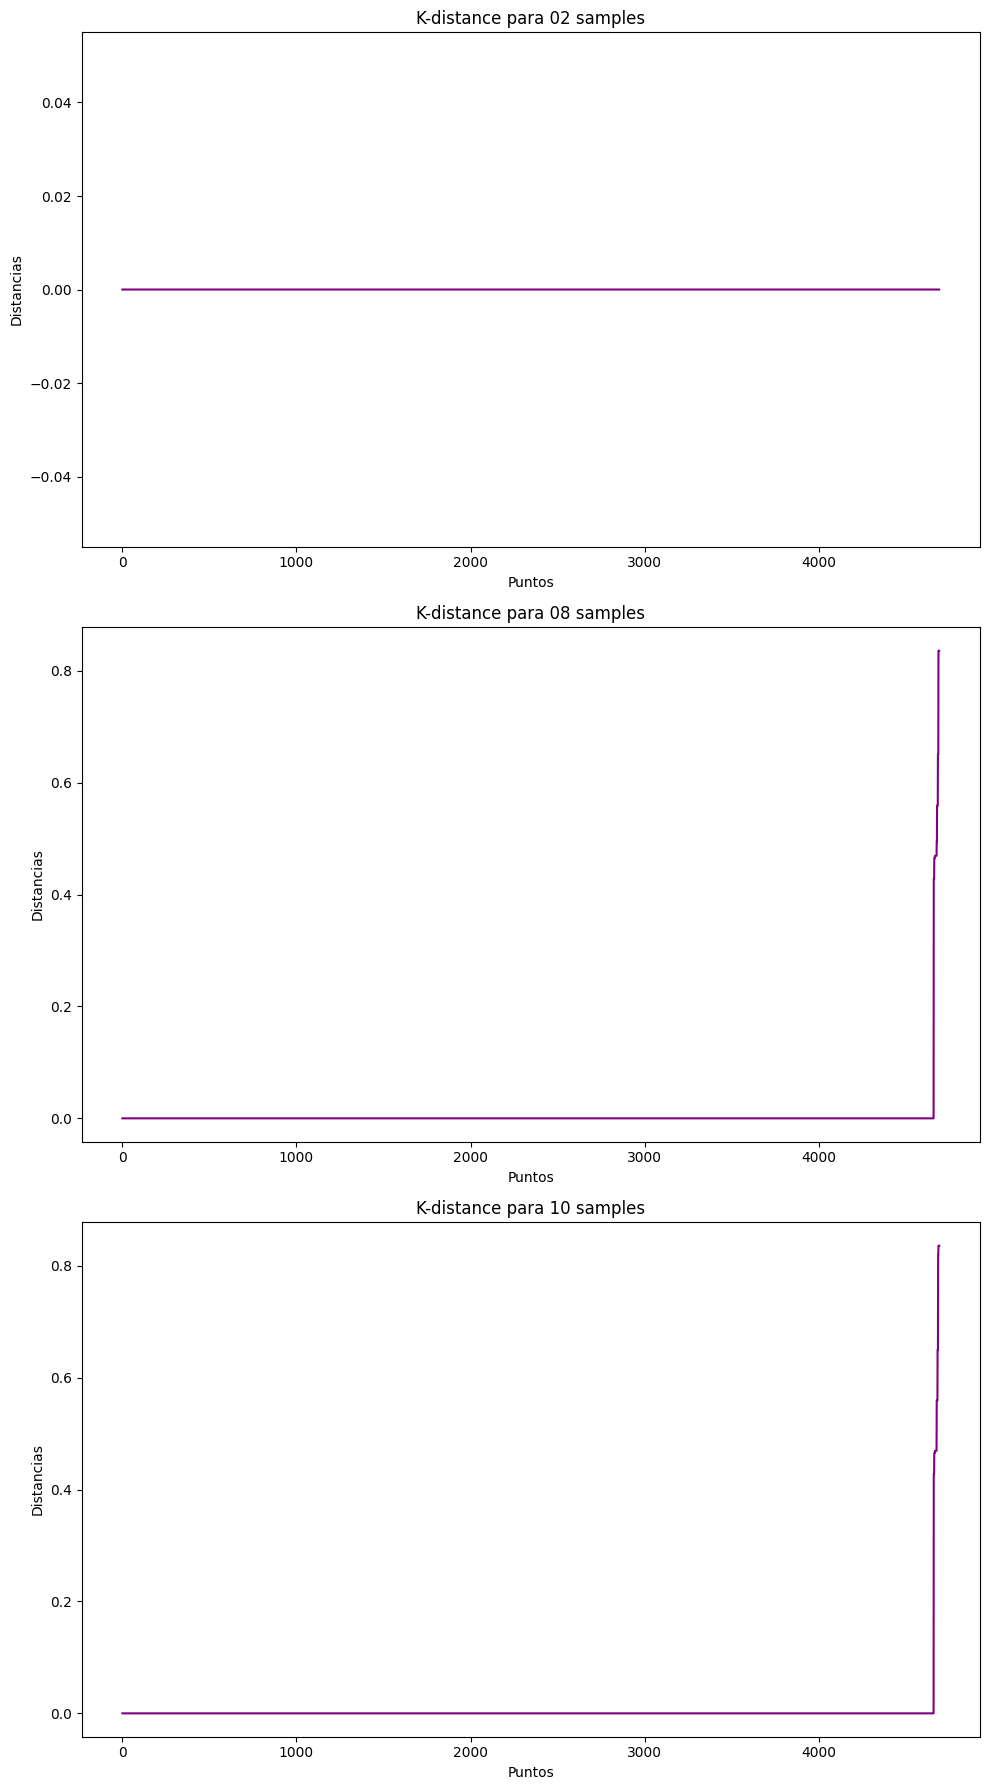

In [226]:
# Dibujamos el k-distance
dibujar_k_distance(df_clustering, min_samples)

Esto es muy interesante:
- Vemos que la ditancia ideal `es 0,` lo cual confirma las **platillas repetidas ya definidas.**
- Si subimos un poco más, pues ya `mezclamos unos jugadores con otros,` lo cuál lo más probable es que `no logre diferenciar bien los grupos,` por ejemplo, **metiendo los legendarios con los segundos normales.**
- Los resultados son `identicos tanto con 8 como con 10 min_samples.`

Dicho esto, ya sabemos que probar: Un **min_samples de 8 y 10,** y un **eps que `no supere el 0.0 y 0.5 (obviamente que no sea 0, y 0.5 para ver que pasa al fusionarlos, puede aún así ser interesante).`** Dicho esto, vamos a definir lo que vamos a probar:

In [227]:
# Definimos los eps a probar (se puede variar)
eps_probar = np.linspace(0.1, 0.5, 3)  # El 3 podeis probar con mas si quereis

# Lo metemos a nuestro min_samples
parametros_dbscan = {
    min_sample: eps_probar for min_sample in min_samples
}
parametros_dbscan

{2: array([0.1, 0.3, 0.5]),
 8: array([0.1, 0.3, 0.5]),
 10: array([0.1, 0.3, 0.5])}

#### **Probemos DBSCAN**
Definido esto, vamos a probar el algoritmo con lo que nos hemos definido:

In [228]:
# Libreria a usar
from sklearn.cluster import DBSCAN

In [229]:
# Resultados del debscan
resultados_dbscan = dict()

# Bucle para orobar (mientras mas eps, mas lento demora)
for min_sample, valores_eps in parametros_dbscan.items():
    for valor_eps in valores_eps:

        # Ejecutamos el algoritmo
        resultado_dbscan = DBSCAN(eps=valor_eps, min_samples=min_sample).fit_predict(df_clustering)

        # Nombre del resultado
        columna_dbscan = f'{min_sample:02d}_{valor_eps:.2f}_cluster'

        # Vemos si es duplicado
        genera_duplicados = any(np.array_equal(value, resultado_dbscan) for value in resultados_dbscan.values())

        # Si lo es, decimos que no lo aniadimos
        if genera_duplicados:
            print(f'El resultado de {columna_dbscan} genera un resultado ya almacenado')

        # Si no, lo almacenamos
        else:
            resultados_dbscan[columna_dbscan] = resultado_dbscan

# Ordenamos los valores
resultados_dbscan_ordenado = dict(sorted(resultados_dbscan.items(), key=lambda x: len(x[1])))

# Pasamos a df el resultado
df_resultado_dbscan = pd.DataFrame(resultados_dbscan)
df_resultado_dbscan

El resultado de 02_0.30_cluster genera un resultado ya almacenado
El resultado de 08_0.30_cluster genera un resultado ya almacenado
El resultado de 10_0.10_cluster genera un resultado ya almacenado
El resultado de 10_0.30_cluster genera un resultado ya almacenado


,02_0.10_cluster,02_0.50_cluster,08_0.10_cluster,08_0.50_cluster,10_0.50_cluster
0,0,0,-1,0,1
1,1,1,0,1,0
2,1,1,0,1,0
3,1,1,0,1,0
4,1,1,0,1,0
...,...,...,...,...,...
4688,13,11,7,9,9
4689,21,16,15,14,14
4690,21,16,15,14,14
4691,12,10,6,8,8


#### **Evaluar los resultados**
Como sabemos que DBSCAN, aunque use **la distancia** en cierto punto, `no buscar clústers circulares (o con forma de circunferencia).` Por ello, no es muy fiable confiar en `los resultados de los scores a probar.` Lo mejor es analizar cada uno. Ojo que es importante `quitar los registros con el clúster -1` ya que no tienen grupo asignado (clúster):

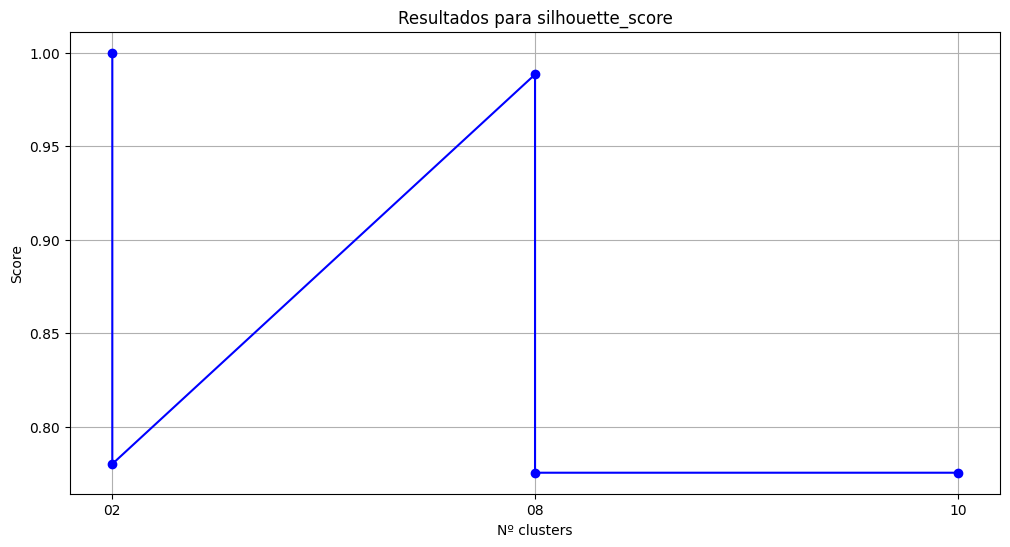

Score mas alto para silhouette_score: 02_0.10_cluster - 1.00
Score mas bajo para silhouette_score: 08_0.50_cluster - 0.78


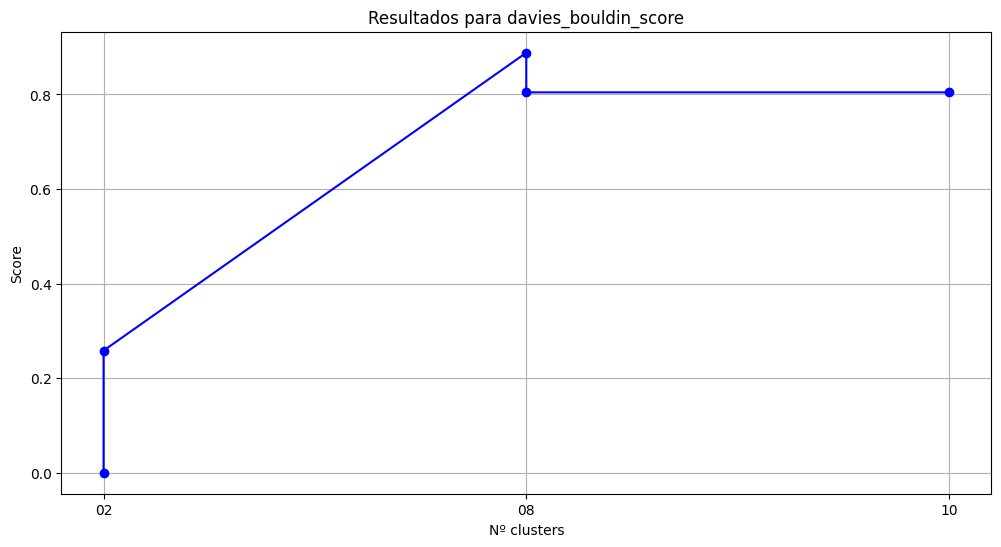

Score mas alto para davies_bouldin_score: 08_0.10_cluster - 0.89
Score mas bajo para davies_bouldin_score: 02_0.10_cluster - 0.00


In [230]:
# DF con el resultado agregado de DBSCAN (sin los -1)
df_dbscan = pd.concat([df_clustering.copy(), df_resultado_dbscan], axis=1)
df_dbscan_sin_sucio = df_dbscan[(df_resultado_dbscan != -1).all(axis=1)].copy()

# Graficamos el resultado del score de silueta
calcular_scores_graficar(df_dbscan, df_resultado_dbscan.columns, silhouette_score)

# Y el de Davies
calcular_scores_graficar(df_dbscan, df_resultado_dbscan.columns, davies_bouldin_score)

Esto deja cosas muy interesantes:
- No os asusteis por las lineas verticales, recordar que `probamos min_samples con distintos eps.`
- Aunque parecia que con `min_samples 2` iba a tener un silueta perfecto (suponiendo que iba a encontrar las plantillas), con un **eps igual a 0.5,** se ve una `bajada en el score de silueta,` pero siendo todavia un score muy alto (0.8).
- Si vemos con `min_samples 2` el score de Davies, vemos que sucede **lo mismo que con silueta:** Con un eps igual a 0.5 `termina aumentando el score,` lo cual es un empeoramiento, aunque muy aceptable todavía.
- Con `min_samples 8,` pasa exactamente lo mismo que con **min_samples 2,** pero solo en silueta: La única diferencia es que con **eps de 0.1,** el score `no es 1, pero está muy cerca de ello, indicando clústers casi perfectos.` Será muy interesante analizarlo.
- Pero con Davies, vemos que `el eps de 0.5 es mejor que el de 0.1,` lo cual puede indicar **clústers menos compactos.** Aunque es verdad que ambos `no tienen buenos scores.`
- Con `min_samples 10` tenemos los **mismos resultados que con min_samples 8 y eps 0.5.**

Con esto, vamos a probar con `min_samples 2 y eps 0.1 y 0.5,` y solo por curiosear, con `min_samples 8 y eps 0.5,` ya que resultó ser **el tercer mejor resultado en scores (aunque bajo en Davies).** Como recordatorio, con clústerings `basados en densidad,` los scores que probamos a veces **no reflejan la realidad** al basarce en distancias y en clústers `circulares.` Lo mejor es analizarlo cada uno al detalle.

#### **Evaluar los resultados**
Ahora, hay que ponerle más hincapié porque aquí es donde veremos **si los resultados son buenos o no.**

In [231]:
# Mostramos los resultados con DBSCAN
analizar_resultados_clustering(df_analisis, df_resultado_dbscan[['02_0.10_cluster', '02_0.50_cluster', '08_0.50_cluster']])

=============== Stats con 02_0.10_cluster ===============


02_0.10_cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
disparo,140.0,169.0,145.0,126.0,154.0,140.0,163.0,135.0,120.0,120.0,120.0,116.0,130.0,116.0,159.0,135.0,149.0,116.0,110.0,116.0,130.0,145.0,154.0,126.0,110.0,106.0,110.0,110.0,159.0,126.0
control,161.0,161.0,156.0,135.0,151.0,151.0,156.0,156.0,126.0,131.0,131.0,120.0,151.0,120.0,151.0,145.0,145.0,126.0,116.0,126.0,141.0,141.0,145.0,145.0,116.0,110.0,120.0,120.0,156.0,131.0
tecnica,162.0,147.0,152.0,127.0,137.0,147.0,142.0,156.0,127.0,123.0,123.0,117.0,152.0,123.0,137.0,142.0,133.0,117.0,113.0,117.0,137.0,127.0,133.0,147.0,117.0,107.0,113.0,113.0,142.0,133.0
defensa,123.0,123.0,127.0,137.0,123.0,123.0,117.0,117.0,137.0,133.0,137.0,142.0,113.0,133.0,113.0,117.0,117.0,133.0,137.0,127.0,113.0,113.0,107.0,107.0,127.0,133.0,123.0,127.0,127.0,142.0
fisico,119.0,119.0,128.0,147.0,119.0,123.0,114.0,114.0,142.0,142.0,142.0,147.0,109.0,138.0,109.0,119.0,114.0,138.0,142.0,138.0,114.0,109.0,105.0,105.0,133.0,138.0,133.0,133.0,123.0,147.0
velocidad,119.0,119.0,119.0,155.0,113.0,113.0,113.0,113.0,123.0,149.0,145.0,123.0,109.0,119.0,109.0,109.0,109.0,141.0,119.0,145.0,105.0,105.0,105.0,105.0,113.0,113.0,141.0,137.0,119.0,127.0
inteligencia,145.0,130.0,140.0,135.0,135.0,135.0,126.0,140.0,154.0,130.0,130.0,163.0,135.0,149.0,120.0,130.0,130.0,126.0,159.0,126.0,126.0,126.0,116.0,130.0,145.0,154.0,120.0,120.0,140.0,159.0


=============== Resultados de posicion_en con 02_0.10_cluster ===============


02_0.10_cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
posicion_en,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DF,0,0,0,0,0,0,0,0,15,0,0,5,0,60,0,0,0,0,35,0,0,0,0,0,739,520,0,0,0,3
FW,0,27,0,0,4,0,31,0,0,0,0,0,0,0,88,0,22,0,0,0,0,382,636,0,0,0,0,0,3,0
GK,0,0,0,5,0,0,0,0,0,10,3,0,0,0,0,0,0,13,0,40,0,0,0,0,0,0,388,305,0,0
MF,2,0,7,0,0,21,0,12,0,0,0,0,40,0,0,86,0,0,0,0,616,0,0,575,0,0,0,0,0,0


=============== Stats con 02_0.50_cluster ===============


02_0.50_cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
disparo,147.7,169.0,126.0,142.2,163.0,135.0,120.0,120.0,116.3,116.0,130.0,116.0,159.0,137.9,110.2,110.0,132.2,154.0,110.0,106.0,110.0,126.0
control,156.8,161.0,135.0,151.0,156.0,156.0,126.0,131.0,126.3,120.0,151.0,120.0,151.0,145.0,120.2,116.0,142.5,145.0,116.0,110.0,120.0,131.0
tecnica,151.2,147.0,127.0,145.4,142.0,156.0,127.0,123.0,117.4,117.0,152.0,123.0,137.0,140.2,113.1,113.0,138.2,133.0,117.0,107.0,113.0,133.0
defensa,126.3,123.0,137.0,123.0,117.0,117.0,137.0,133.0,127.7,142.0,113.0,133.0,113.0,117.0,123.3,137.0,110.8,107.0,127.0,133.0,127.0,142.0
fisico,125.2,119.0,147.0,122.4,114.0,114.0,142.0,142.0,138.3,147.0,109.0,138.0,109.0,118.0,133.2,142.0,109.5,105.0,133.0,138.0,133.0,147.0
velocidad,119.0,119.0,155.0,113.0,113.0,113.0,123.0,149.0,145.0,123.0,109.0,119.0,109.0,109.0,141.0,119.0,105.0,105.0,113.0,113.0,137.0,127.0
inteligencia,140.8,130.0,135.0,135.0,126.0,140.0,154.0,130.0,126.3,163.0,135.0,149.0,120.0,130.0,120.2,159.0,127.5,116.0,145.0,154.0,120.0,159.0


=============== Resultados de posicion_en con 02_0.50_cluster ===============


02_0.50_cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
posicion_en,,,,,,,,,,,,,,,,,,,,,,
DF,0,0,0,0,0,0,15,0,0,5,0,60,0,0,0,35,0,0,739,520,0,3
FW,3,27,0,4,31,0,0,0,0,0,0,0,88,22,0,0,382,636,0,0,0,0
GK,0,0,5,0,0,0,0,10,43,0,0,0,0,0,401,0,0,0,0,0,305,0
MF,9,0,0,21,0,12,0,0,0,0,40,0,0,86,0,0,1191,0,0,0,0,0


=============== Stats con 08_0.50_cluster ===============


08_0.50_cluster,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
disparo,122.2,147.7,169.0,142.2,163.0,135.0,120.0,120.0,116.3,130.0,116.0,159.0,137.9,110.2,110.0,132.2,154.0,110.0,106.0,110.0
control,128.3,156.8,161.0,151.0,156.0,156.0,126.0,131.0,126.3,151.0,120.0,151.0,145.0,120.2,116.0,142.5,145.0,116.0,110.0,120.0
tecnica,124.5,151.2,147.0,145.4,142.0,156.0,127.0,123.0,117.4,152.0,123.0,137.0,140.2,113.1,113.0,138.2,133.0,117.0,107.0,113.0
defensa,140.1,126.3,123.0,123.0,117.0,117.0,137.0,133.0,127.7,113.0,133.0,113.0,117.0,123.3,137.0,110.8,107.0,127.0,133.0,127.0
fisico,147.0,125.2,119.0,122.4,114.0,114.0,142.0,142.0,138.3,109.0,138.0,109.0,118.0,133.2,142.0,109.5,105.0,133.0,138.0,133.0
velocidad,136.2,119.0,119.0,113.0,113.0,113.0,123.0,149.0,145.0,109.0,119.0,109.0,109.0,141.0,119.0,105.0,105.0,113.0,113.0,137.0
inteligencia,151.3,140.8,130.0,135.0,126.0,140.0,154.0,130.0,126.3,135.0,149.0,120.0,130.0,120.2,159.0,127.5,116.0,145.0,154.0,120.0


=============== Resultados de posicion_en con 08_0.50_cluster ===============


08_0.50_cluster,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
posicion_en,,,,,,,,,,,,,,,,,,,,
DF,8,0,0,0,0,0,15,0,0,0,60,0,0,0,35,0,0,739,520,0
FW,0,3,27,4,31,0,0,0,0,0,0,88,22,0,0,382,636,0,0,0
GK,5,0,0,0,0,0,0,10,43,0,0,0,0,401,0,0,0,0,0,305
MF,0,9,0,21,0,12,0,0,0,40,0,0,86,0,0,1191,0,0,0,0


##### **Analizando con min_sample 2 y eps 0.1**
Los resultados nos confirman al 100% algo:
- Hemos encontrado de nuevo `las 30 plantillas predefinidas.` Si DBSCAN nos dice esto, es porque en verdad **los 30 clústers** tienen sus puntos `bien densos/agrupados.`
- Solo queda verificar si da los mismos resultados que los otros algoritmos. De lo contrario, sería un `contraejemplo` a nuestra hipótesis.

Dicho esto, vamos a comprobar si los resultados `son lo mismo que los anteriores:`

In [232]:
# Comparamos el resultado de kmeans (o cualquier otra anterior) y DBSCAN
comparar_resultados_clustering(df_kmeans['30_clusters'], df_dbscan['02_0.10_cluster'])

El resultado del score es 1.0
¿Resultados del clústering iguales? True


Con esto, confirmamos al 100% que `encontramos las 30 plantillas definidas por los desarrolladores.` Un muy buen logro.

##### **Analizando con min_sample 2 y eps 0.5**
Vemos cosas muy parecidas:
- Increíblemente, `no tenemos puntos sin clasificar (que sean del clúster -1).` Esto sorprende, ya que en teoría, **habrá detectado que no hay juagdores que se queden sin agrupar**
- Si vemos por ejmeplo `el clúster 0,` vemos que **combina jugadores** al tener algunas stats con decimales.
- Compararlo con el `clúster 1 (el de delanteros TOP),` resultará interesante, ya que **no discrepan mucho (a excepción del tiro)** con las demás stats.

Dicho esto, vamos a ver los mejores jugadores del `clúster 0 y 1:`

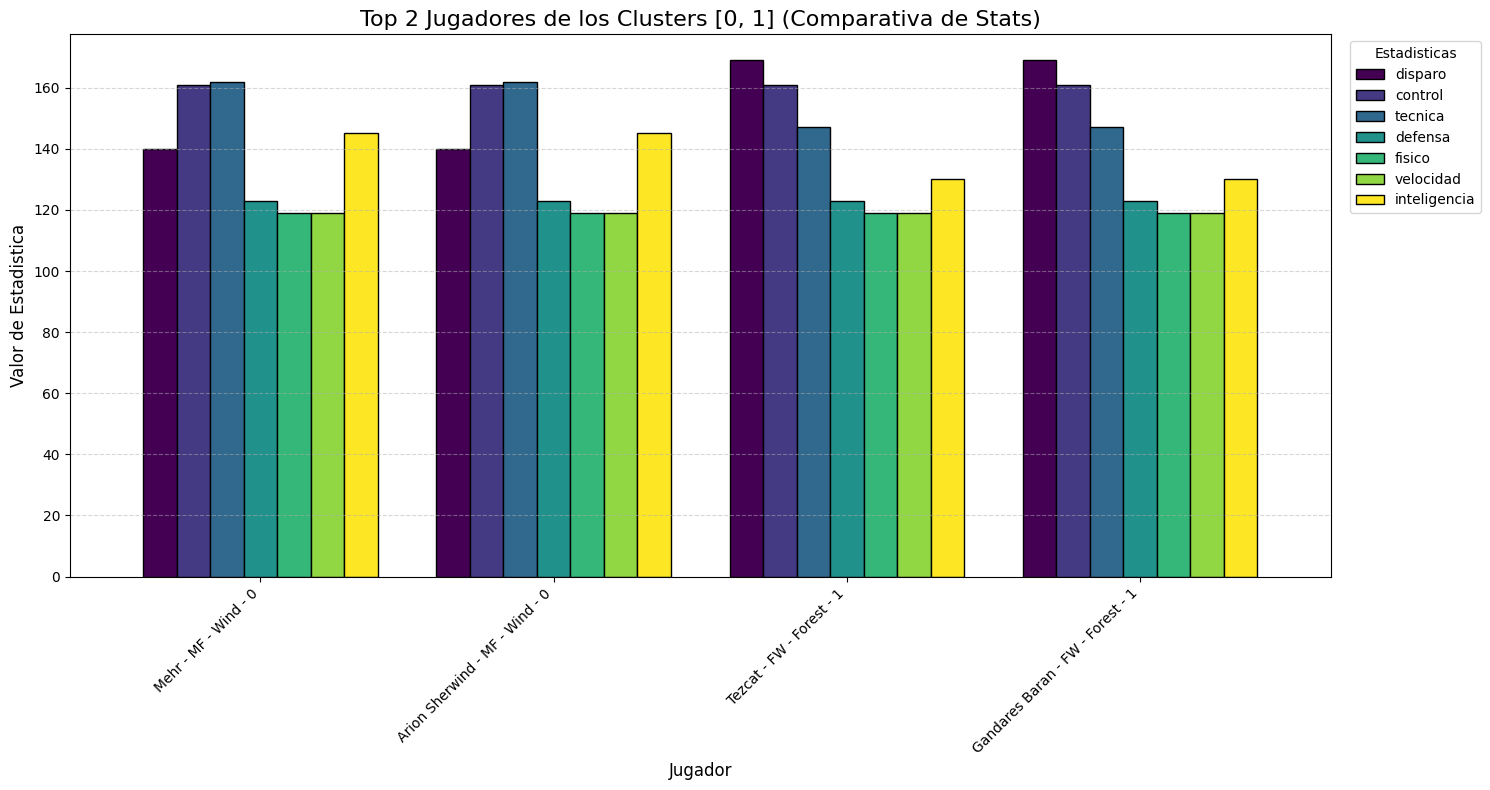

In [233]:
# Sacamos los mejores jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_resultado_dbscan['02_0.50_cluster'], [0, 1])

Esto sí que resulta interesante:
- Vemos que `los mejores jugadores de cada clúster` tienen casi **las mismas statsen la parte defensiva,** diferenciandose un poco en la inteligencia (mejor lo tiene los del clúster 0).
- Aún así, la diferencia radica en `el disparo y la técnica:` Los del **clúster 0** tienen mejor técnica que los del 1, siendo esta diferencia `casi la misma` si comparamos el disparo de los del clúster 1 con los del 0.
- En situaciones donde tu equipo `necesita proteger un resultado, por ejemplo, teniendo el balón,` los jugadores del **clúster 0** son una buena opción de `delanteros con calidad para mantener la posesión.` En alguna final, que el rival no tenga el valor puede **generar espacios para buenos contraataques.**

Hemos encontrado inform,ación interesante, `lo esperado tras los resultados de los demás algoritmos.` Explorar y analizar más los resultados puede llevar a **encontrar jugadores versátiles, o para posiciones/situaciones concretas,** como ya lo hemos visto.

##### **Analizando con min_sample 8 y eps 0.5**
Aquí si pasa lo esperado:
- Ya tenemos `puntos que no logra asignar a un clúster,` los cuales, son el grupo **de -1.**
- Lo curioso en que llegan a ser `tan buenos defensores (DF o GK) como los defensas del clúster 13,` lo cual, aparenta almacenar a defensores muy buenos.
- Es curioso ver por qué **los del clúster -1** no son algunos parte del `clúster 13,` si tienen buenas stats para ser **buenos defensores.**

Dicho esto, vamos a comparar el `clúster -1 y 13,` para saber por qué el -1 **tiene datos sucios y no están en el grupo 13, de defensas TOP:**

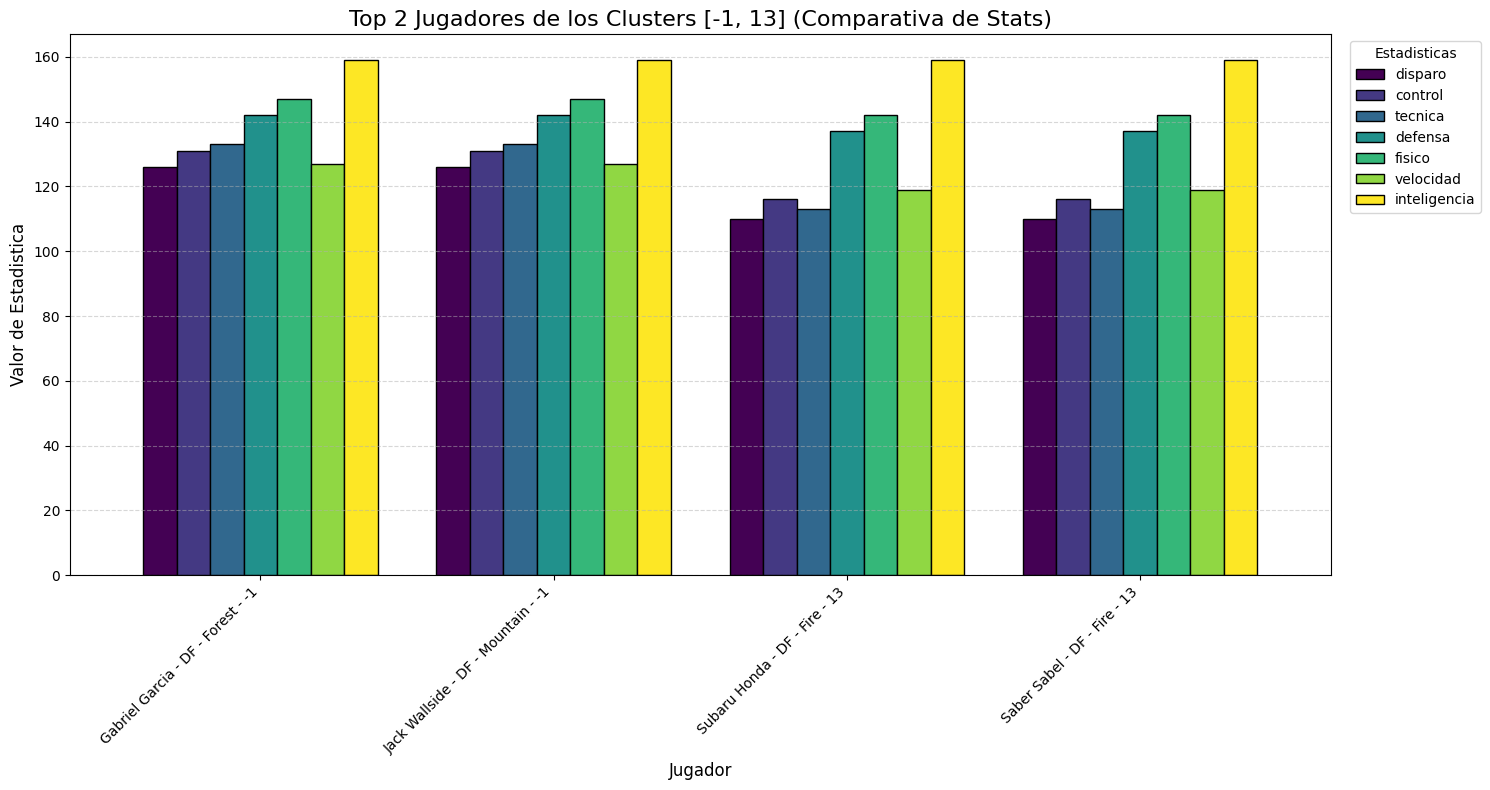

In [234]:
# Sacamos los mejores jugadores de cada cluster y vemos sus stats
mostrar_mejores_jugadores_grafico(df_valores_unicos, df_resultado_dbscan['08_0.50_cluster'], [-1, 13])

Esto resulta más interesante:
- Los del `clúster -1 (en teoría puntos sucios),` logran ser **defensores mucho mejores que los del `clúster 13,`** superándolo en casi todas las stats (menos en inteligencia, que lo tienen igual).
- Mientras el `clúster 13,` logra almacenar **defensores que solo destacan por su inteligencia.** Según los resultados, no aprecen ser los mejores para un competitivo.
- Esto explica por qué los del `clúster -1` no están en el **clúster 13:** Para DBSCAN, son **defensores TOP.**

Esto es bueno, porque confirma que el algoritmo `ha encontrado jugadores que son fuera de lo común (los defensas).` Lo curioso también sería analizar **los GK del clúster -1,** pero es algo que lo dejo para analizarlo voluntariamente.

## **Conclusiones del trabajo**
Podemos sacar muy buenas conclusiones luego de este largo recorrido:
- Hemos demostrado la existencia de las `30 plantillas que usan los desarrolladores.` Es verdad que a lo mejor la comunidad ya lo sabia, pero primero, lo hemos demostrado **matemáticamente con algoritmos de clústering,** y segundo, tenemos etiquetados a `los jugadores y su información de cada grupo.`
- Más allá de eso, al probar `distintas combinaciones,` hemos encontrado jugadores, los cuales **pueden desempeñar una función** según `una situación concreta de un partido,` o bien como `un plan de emergencia.`
- Hemos comprobado también la `calidad de los resultados,` al comprobarlo con métricas como **Silueta o Davies.** Los resultados de calidad, tanto con las `30 plantillas` como con `los demás resultados` fueron de mucha calidad en general.
- Los diferentes algortimos, al final, `convergen al encontrar las plantillas (dando los mismo resultados al obtener un ARI de 1.0).` Esto que sigue confirmando las 30 plantillas del juego.
- No nos podemos quedar aqui: Podemos seguir `analizando los resultados,` ya que podemos encontrar **más jugadores con características interesantes** para cierto `tipo de partidos/situaciones.`

Con esto, podemos dar por concluido nuestra aventura, siempre abiertos a probar más cosas (algoritmos como HDBSCAN, que intenta `mejorar a BDSCAn,` analizar a profundidad **los resultados que no sean las 30 plantillas,** probar más `métricas de calidad / hiperparámetros,` entre mucho más). El mundo del aprendizaje no supervisado tiene tanto por explorar, que quedarnos aquí es un error. No obstante, hemos sembrado las bases para `continuar con un mundo por explorar, pero con más confianza en los resultados.`